## Census Income — EDA 


In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

#Supress warnings
import warnings
warnings.filterwarnings("ignore")

COLUMNS_FILE = Path("census-bureau.columns")
DATA_FILE = Path("census-bureau.data")

# Read column names
cols = [c.strip() for c in COLUMNS_FILE.read_text().strip().splitlines() if c.strip()]

# Loadind data
census_data = pd.read_csv(
    DATA_FILE,
    header=None,
    names=cols,
    skipinitialspace=True, 
)

census_data.shape

(199523, 42)

In [2]:
print(census_data.head(10))
print(census_data.tail(10))

# Types and non-null counts
census_data.info()


   age                 class of worker  detailed industry recode  \
0   73                 Not in universe                         0   
1   58  Self-employed-not incorporated                         4   
2   18                 Not in universe                         0   
3    9                 Not in universe                         0   
4   10                 Not in universe                         0   
5   48                         Private                        40   
6   42                         Private                        34   
7   28                         Private                         4   
8   47                Local government                        43   
9   34                         Private                         4   

   detailed occupation recode                   education  wage per hour  \
0                           0        High school graduate              0   
1                          34  Some college but no degree              0   
2                      

Hispanic Origin is the only column with missing data. 

Notice a bunch of 'Not in universe' and '?'

In [3]:
# Missingness (NaN-based only)
missing_pct = (census_data.isna().mean() * 100).sort_values(ascending=False)
display(missing_pct.head(42).round(2).rename("missing_%"))

# Cardinality by column
nunique = census_data.nunique(dropna=False).sort_values(ascending=False)
display(nunique.head(42).rename("nunique"))

# Quick label and weight glance
if "label" in census_data.columns:
    print("\nLabel counts:")
    display(census_data["label"].value_counts(dropna=False))
if "weight" in census_data.columns:
    print("\nWeight summary:")
    display(census_data["weight"].describe())

hispanic origin                               0.44
age                                           0.00
weight                                        0.00
migration code-change in msa                  0.00
migration code-change in reg                  0.00
migration code-move within reg                0.00
live in this house 1 year ago                 0.00
migration prev res in sunbelt                 0.00
num persons worked for employer               0.00
family members under 18                       0.00
country of birth father                       0.00
detailed household and family stat            0.00
country of birth mother                       0.00
country of birth self                         0.00
citizenship                                   0.00
own business or self employed                 0.00
fill inc questionnaire for veteran's admin    0.00
veterans benefits                             0.00
weeks worked in year                          0.00
year                           

weight                                        99800
dividends from stocks                          1478
wage per hour                                  1240
capital gains                                   132
capital losses                                  113
age                                              91
weeks worked in year                             53
detailed industry recode                         52
state of previous residence                      51
detailed occupation recode                       47
country of birth self                            43
country of birth mother                          43
country of birth father                          43
detailed household and family stat               38
major industry code                              24
education                                        17
major occupation code                            15
migration code-move within reg                   10
migration code-change in msa                     10
hispanic ori


Label counts:


label
- 50000.    187141
50000+.      12382
Name: count, dtype: int64


Weight summary:


count    199523.000000
mean       1740.380269
std         993.768156
min          37.870000
25%        1061.615000
50%        1618.310000
75%        2188.610000
max       18656.300000
Name: weight, dtype: float64

Heavily imbalanced dataset towards income <50k

In [4]:
# Count literal '?' occurrences per column
question_counts = census_data.eq("?").sum().sort_values(ascending=False)
has_q = (question_counts > 0).any()

print("Columns containing '?':", question_counts[question_counts > 0].index.tolist())
display(question_counts[question_counts > 0].head(20))

# If present, convert '?' to proper NaN in-place
if has_q:
    census_data = census_data.replace("?", np.nan)

# Re-check missingness after normalization
missing_pct2 = (census_data.isna().mean() * 100).sort_values(ascending=False)
display(missing_pct2.head(42).round(2).rename("missing_%"))

Columns containing '?': ['migration code-change in msa', 'migration code-change in reg', 'migration code-move within reg', 'migration prev res in sunbelt', 'country of birth father', 'country of birth mother', 'country of birth self', 'state of previous residence']


migration code-change in msa      99696
migration code-change in reg      99696
migration code-move within reg    99696
migration prev res in sunbelt     99696
country of birth father            6713
country of birth mother            6119
country of birth self              3393
state of previous residence         708
dtype: int64

migration code-change in msa                  49.97
migration code-change in reg                  49.97
migration code-move within reg                49.97
migration prev res in sunbelt                 49.97
country of birth father                        3.36
country of birth mother                        3.07
country of birth self                          1.70
hispanic origin                                0.44
state of previous residence                    0.35
citizenship                                    0.00
detailed household and family stat             0.00
own business or self employed                  0.00
family members under 18                        0.00
num persons worked for employer                0.00
fill inc questionnaire for veteran's admin     0.00
live in this house 1 year ago                  0.00
veterans benefits                              0.00
weeks worked in year                           0.00
year                                           0.00
weight      

In [ ]:
num_cols = census_data.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = census_data.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"Numeric columns: {len(num_cols)} | Categorical/object: {len(cat_cols)}")

# Numeric summary
if num_cols:
    display(census_data[num_cols].describe(percentiles=[0.5, 0.9, 0.99]).T)

# Top categories preview
for c in cat_cols[:15]:
    print(f"\n{c} — top categories:")
    display(census_data[c].value_counts(dropna=False).head(12))

Numeric columns: 13 | Categorical/object: 29


,count,mean,std,min,50%,90%,99%,max
age,199523.0,34.494199,22.310895,0.00,33.00,67.000,85.0000,90.0
detailed industry recode,199523.0,15.352320,18.067129,0.00,0.00,43.000,49.0000,51.0
detailed occupation recode,199523.0,11.306556,14.454204,0.00,0.00,35.000,43.0000,46.0
wage per hour,199523.0,55.426908,274.896454,0.00,0.00,0.000,1400.0000,9999.0
capital gains,199523.0,434.718990,4697.531280,0.00,0.00,0.000,8614.0000,99999.0
capital losses,199523.0,37.313788,271.896428,0.00,0.00,0.000,1887.0000,4608.0
dividends from stocks,199523.0,197.529533,1984.163658,0.00,0.00,7.000,4550.0000,99999.0
weight,199523.0,1740.380269,993.768156,37.87,1618.31,3059.822,4778.2534,18656.3
num persons worked for employer,199523.0,1.956180,2.365126,0.00,1.00,6.000,6.0000,6.0
own business or self employed,199523.0,0.175438,0.553694,0.00,0.00,0.000,2.0000,2.0



class of worker — top categories:


class of worker
Not in universe                   100245
Private                            72028
Self-employed-not incorporated      8445
Local government                    7784
State government                    4227
Self-employed-incorporated          3265
Federal government                  2925
Never worked                         439
Without pay                          165
Name: count, dtype: int64


education — top categories:


education
High school graduate                      48407
Children                                  47422
Some college but no degree                27820
Bachelors degree(BA AB BS)                19865
7th and 8th grade                          8007
10th grade                                 7557
11th grade                                 6876
Masters degree(MA MS MEng MEd MSW MBA)     6541
9th grade                                  6230
Associates degree-occup /vocational        5358
Associates degree-academic program         4363
5th or 6th grade                           3277
Name: count, dtype: int64


enroll in edu inst last wk — top categories:


enroll in edu inst last wk
Not in universe          186943
High school                6892
College or university      5688
Name: count, dtype: int64


marital stat — top categories:


marital stat
Never married                      86485
Married-civilian spouse present    84222
Divorced                           12710
Widowed                            10463
Separated                           3460
Married-spouse absent               1518
Married-A F spouse present           665
Name: count, dtype: int64


major industry code — top categories:


major industry code
Not in universe or children          100684
Retail trade                          17070
Manufacturing-durable goods            9015
Education                              8283
Manufacturing-nondurable goods         6897
Finance insurance and real estate      6145
Construction                           5984
Business and repair services           5651
Medical except hospital                4683
Public administration                  4610
Other professional services            4482
Transportation                         4209
Name: count, dtype: int64


major occupation code — top categories:


major occupation code
Not in universe                          100684
Adm support including clerical            14837
Professional specialty                    13940
Executive admin and managerial            12495
Other service                             12099
Sales                                     11783
Precision production craft & repair       10518
Machine operators assmblrs & inspctrs      6379
Handlers equip cleaners etc                4127
Transportation and material moving         4020
Farming forestry and fishing               3146
Technicians and related support            3018
Name: count, dtype: int64


race — top categories:


race
White                          167365
Black                           20415
Asian or Pacific Islander        5835
Other                            3657
Amer Indian Aleut or Eskimo      2251
Name: count, dtype: int64


hispanic origin — top categories:


hispanic origin
All other                    171907
Mexican-American               8079
Mexican (Mexicano)             7234
Central or South American      3895
Puerto Rican                   3313
Other Spanish                  2485
Cuban                          1126
NaN                             874
Do not know                     306
Chicano                         304
Name: count, dtype: int64


sex — top categories:


sex
Female    103984
Male       95539
Name: count, dtype: int64


member of a labor union — top categories:


member of a labor union
Not in universe    180459
No                  16034
Yes                  3030
Name: count, dtype: int64


reason for unemployment — top categories:


reason for unemployment
Not in universe          193453
Other job loser            2038
Re-entrant                 2019
Job loser - on layoff       976
Job leaver                  598
New entrant                 439
Name: count, dtype: int64


full or part time employment stat — top categories:


full or part time employment stat
Children or Armed Forces              123769
Full-time schedules                    40736
Not in labor force                     26808
PT for non-econ reasons usually FT      3322
Unemployed full-time                    2311
PT for econ reasons usually PT          1209
Unemployed part- time                    843
PT for econ reasons usually FT           525
Name: count, dtype: int64


tax filer stat — top categories:


tax filer stat
Nonfiler                        75094
Joint both under 65             67383
Single                          37421
Joint both 65+                   8332
Head of household                7426
Joint one under 65 & one 65+     3867
Name: count, dtype: int64


region of previous residence — top categories:


region of previous residence
Not in universe    183750
South                4889
West                 4074
Midwest              3575
Northeast            2705
Abroad                530
Name: count, dtype: int64


state of previous residence — top categories:


state of previous residence
Not in universe    183750
California           1714
Utah                 1063
Florida               849
North Carolina        812
NaN                   708
Abroad                671
Oklahoma              626
Minnesota             576
Indiana               533
North Dakota          499
New Mexico            463
Name: count, dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

FIG_DIR = Path("figures"); FIG_DIR.mkdir(exist_ok=True)

### Continue: normalize strings and set up plotting
Trim object columns. Keep “Not in universe” as its own category for now.

In [7]:
def strip_object_cols(df: pd.DataFrame) -> pd.DataFrame:
    obj_cols = df.select_dtypes(include=["object"]).columns
    for c in obj_cols:
        df[c] = df[c].astype(str).str.strip()
    return df

census_data = strip_object_cols(census_data.copy())

In [8]:
census_data.shape

(199523, 42)

In [9]:
census_data.head(20)

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,label
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
5,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,...,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,- 50000.
6,42,Private,34,3,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
7,28,Private,4,40,High school graduate,0,Not in universe,Never married,Construction,Handlers equip cleaners etc,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,30,95,- 50000.
8,47,Local government,43,26,Some college but no degree,876,Not in universe,Married-civilian spouse present,Education,Adm support including clerical,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,- 50000.
9,34,Private,4,37,Some college but no degree,0,Not in universe,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.


In [10]:
# Ensure '?' are NaN
if census_data.eq("?").any(axis=None):
    census_data = census_data.replace("?", np.nan)

missing_pct = census_data.isna().mean().mul(100).sort_values(ascending=False)
missing_pct.head(42).round(2)

age                                           0.0
family members under 18                       0.0
detailed household summary in household       0.0
weight                                        0.0
migration code-change in msa                  0.0
migration code-change in reg                  0.0
migration code-move within reg                0.0
live in this house 1 year ago                 0.0
migration prev res in sunbelt                 0.0
num persons worked for employer               0.0
country of birth father                       0.0
class of worker                               0.0
country of birth mother                       0.0
country of birth self                         0.0
citizenship                                   0.0
own business or self employed                 0.0
fill inc questionnaire for veteran's admin    0.0
veterans benefits                             0.0
weeks worked in year                          0.0
year                                          0.0


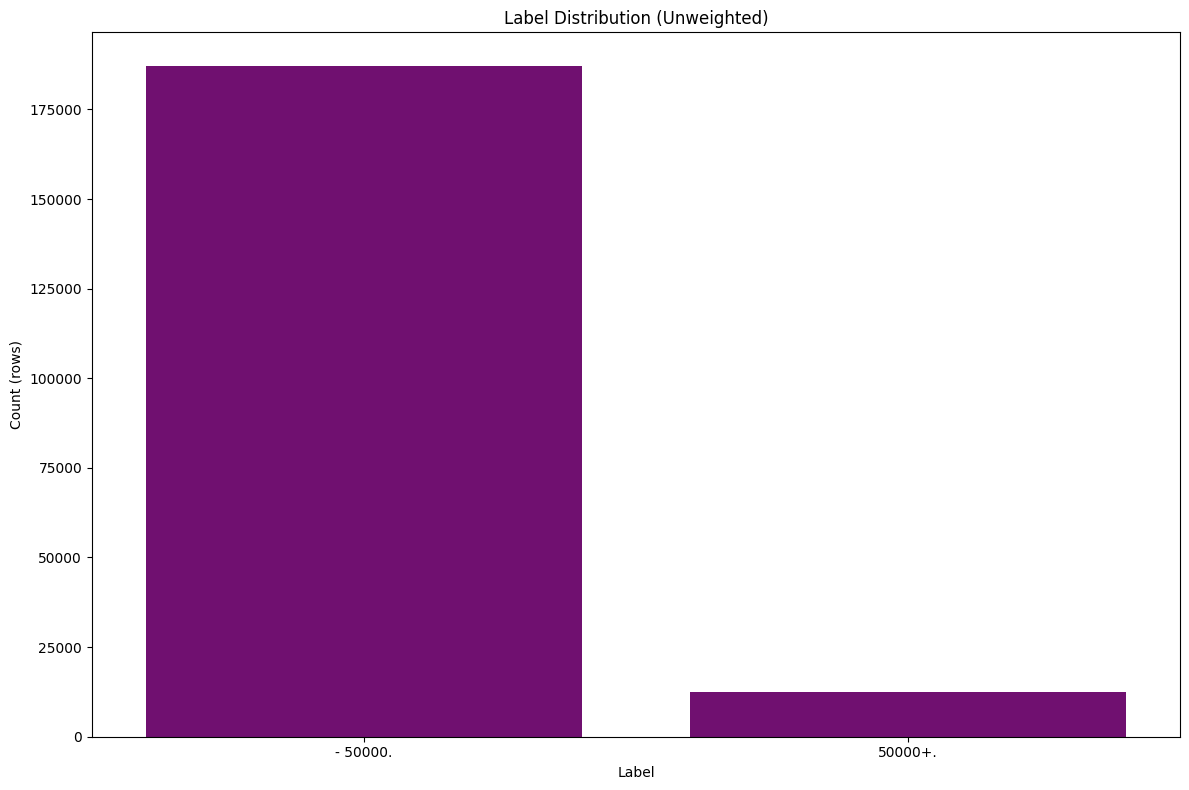

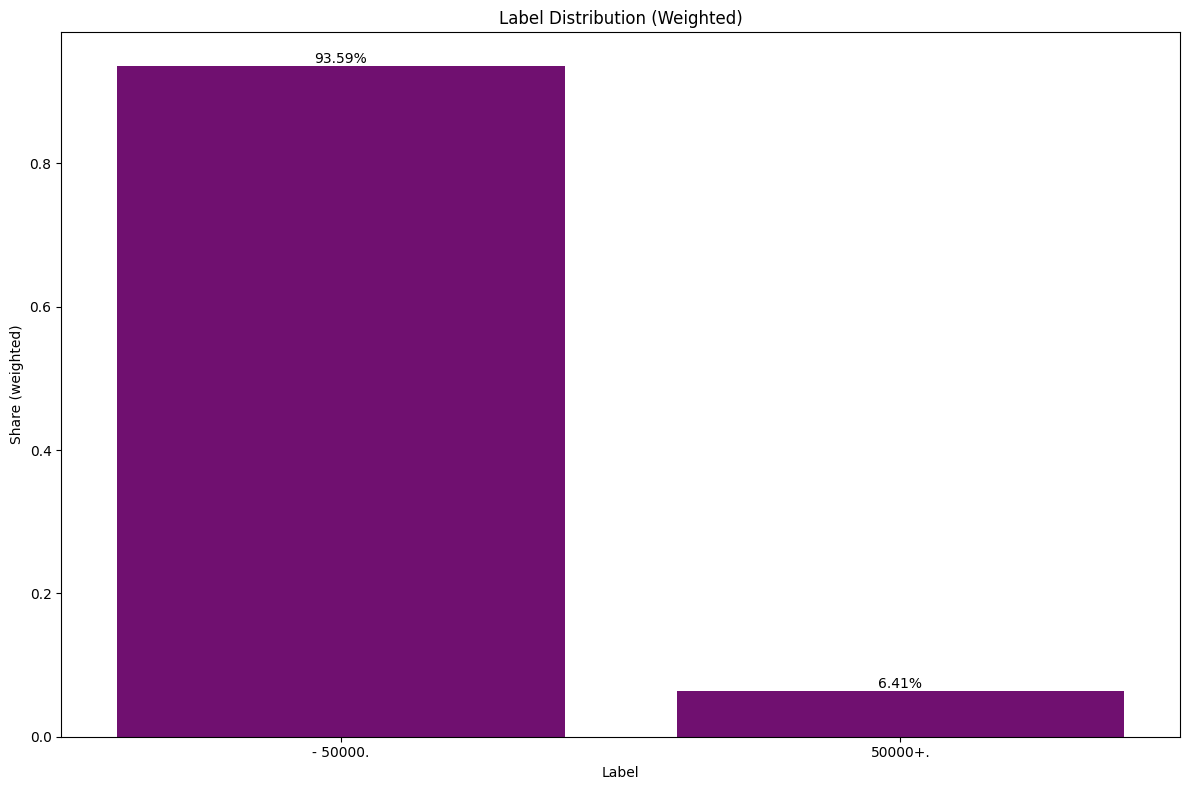

In [11]:
# Unweighted
plt.figure(figsize=(12,8))
ax = sns.countplot(x=census_data["label"], order=["- 50000.", "50000+."], color = 'purple')
ax.set_xlabel("Label"); ax.set_ylabel("Count (rows)")
ax.set_title("Label Distribution (Unweighted)")
plt.tight_layout(); plt.show()

# Weighted share
share_w = (census_data.groupby("label")["weight"].sum()
           / census_data["weight"].sum()).reindex(["- 50000.", "50000+."])

plt.figure(figsize=(12,8))
ax = sns.barplot(x=share_w.index, y=share_w.values, color="purple")
ax.set_xlabel("Label"); ax.set_ylabel("Share (weighted)")
ax.set_title("Label Distribution (Weighted)")
ax.bar_label(ax.containers[0], fmt="{:.2%}")
plt.tight_layout(); plt.show()

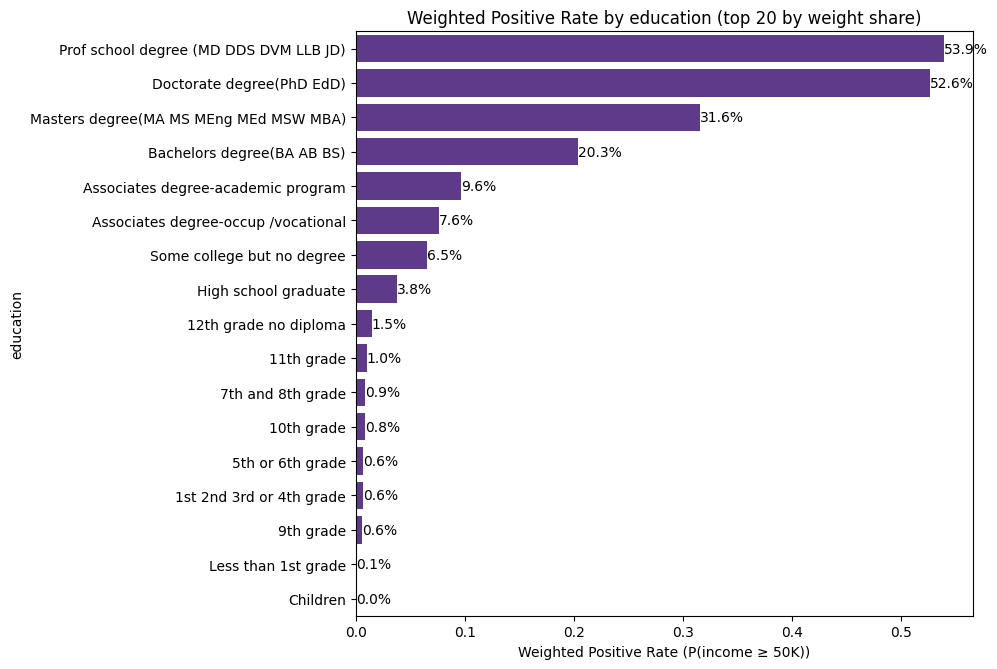

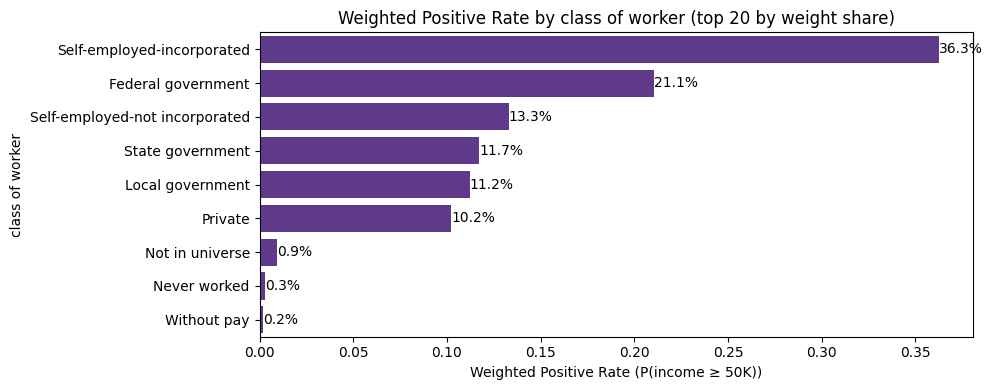

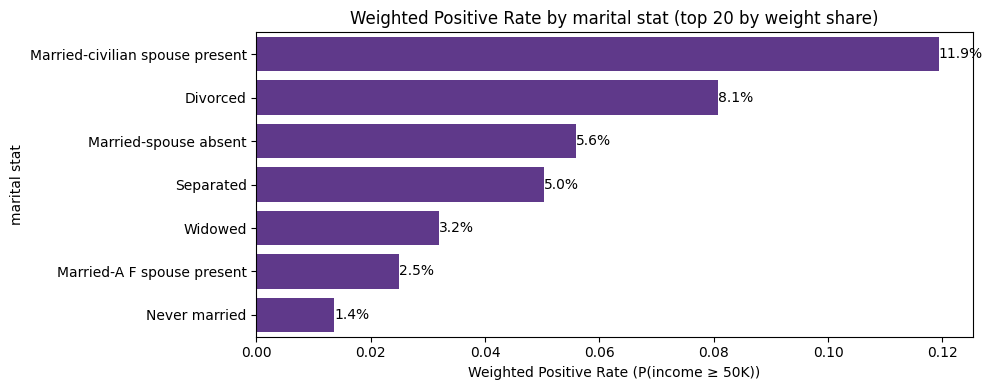

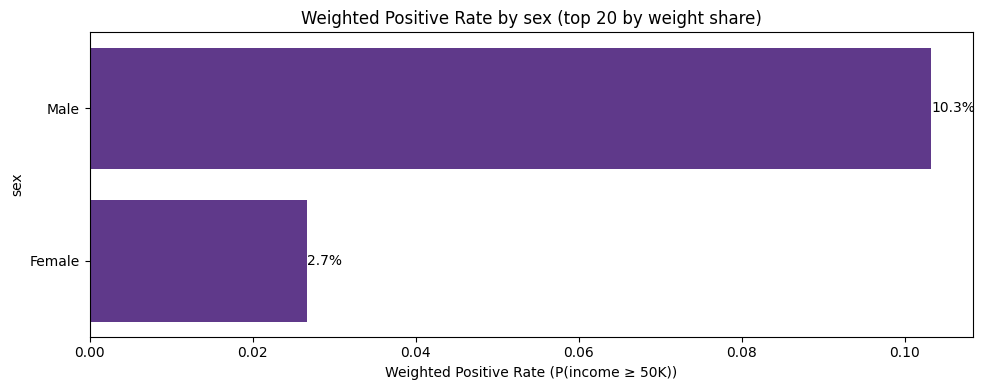

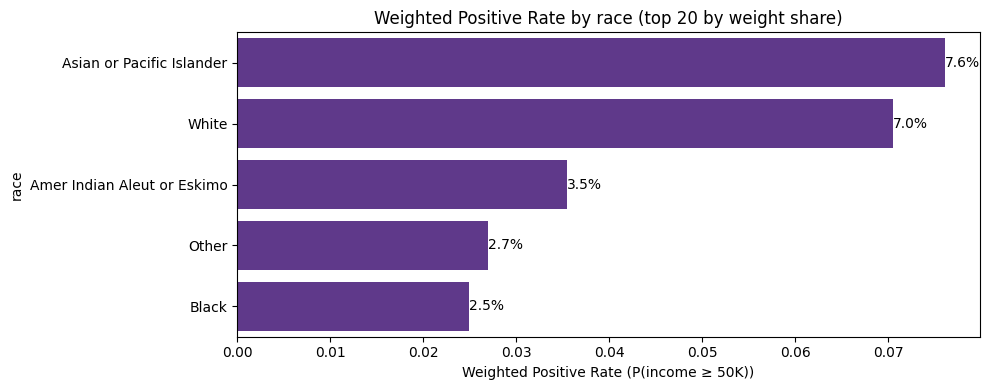

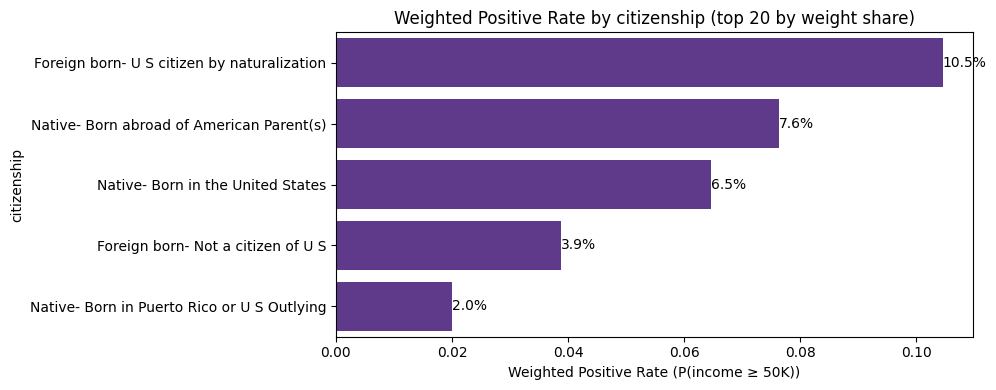

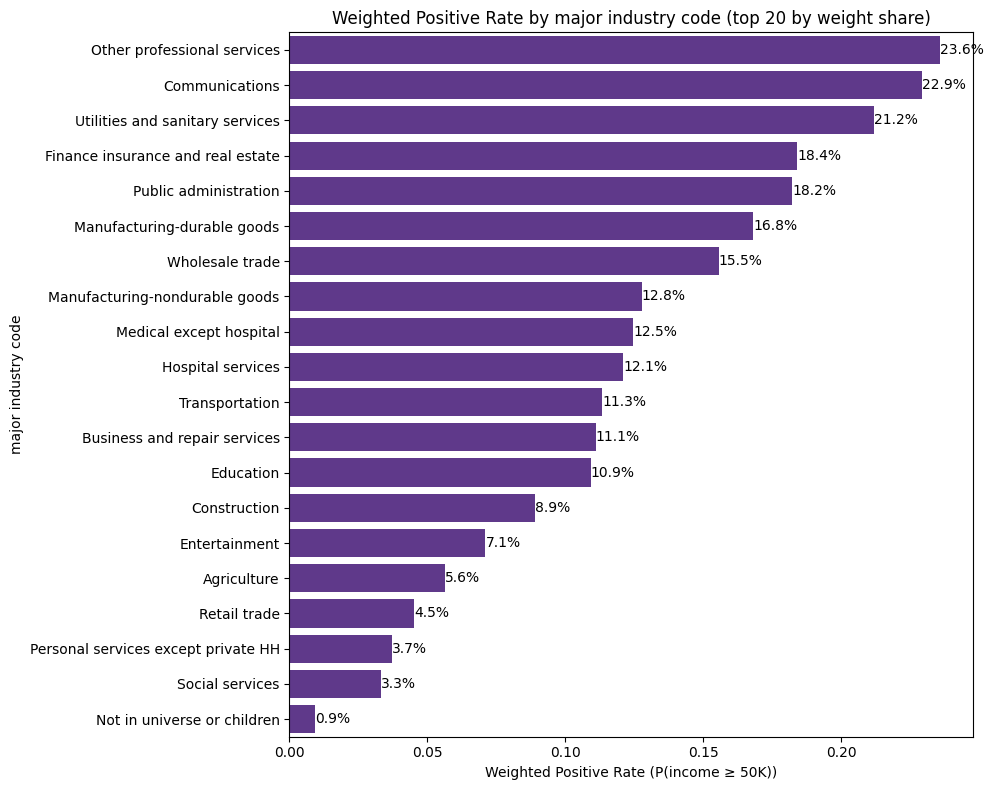

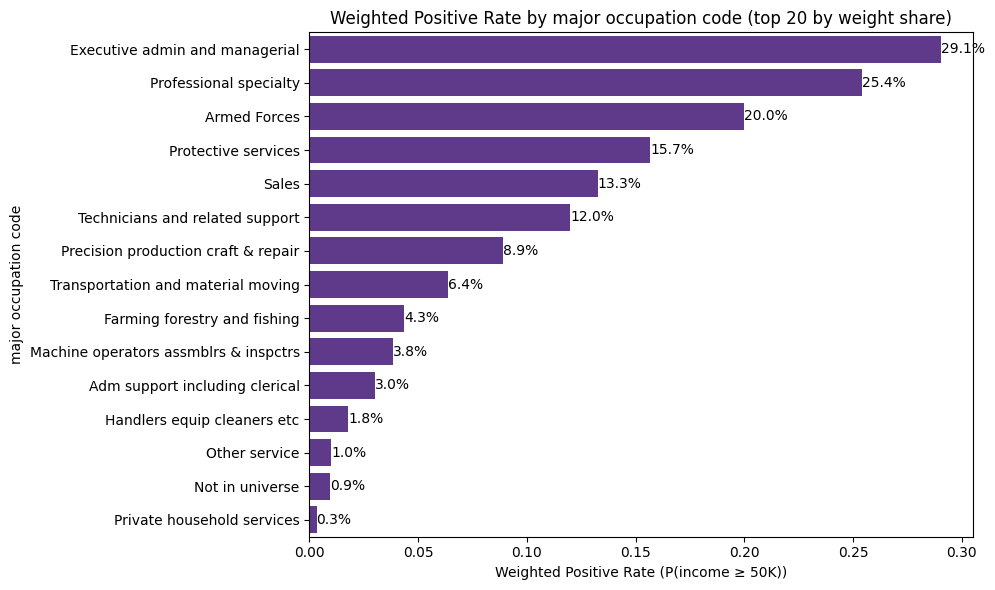

In [ ]:
FIG_DIR = Path("figures"); FIG_DIR.mkdir(exist_ok=True)
TAB_DIR = Path("tables"); TAB_DIR.mkdir(exist_ok=True)

LABEL_MAP = {"- 50000.": 0, "50000+.": 1, "- 50000": 0, "50000+": 1}

def weighted_positive_rate_by_category(df: pd.DataFrame, col: str, top_n: int = 20) -> pd.DataFrame:
    tmp = df[[col, "label", "weight"]].copy()
    tmp["y"] = tmp["label"].map(LABEL_MAP).astype(int)
    grp = tmp.groupby(col, dropna=False)
    w = grp["weight"].sum().rename("weight_total")
    wpos = grp.apply(lambda g: (g["weight"] * g["y"]).sum()).rename("weight_pos")
    out = pd.concat([w, wpos], axis=1)
    out["pos_rate_w"] = out["weight_pos"] / out["weight_total"]
    out["weight_share"] = out["weight_total"] / out["weight_total"].sum()
    out = out.sort_values("weight_share", ascending=False).head(top_n)
    return out.sort_values("pos_rate_w", ascending=False)

def plot_and_save_pos_rate(df: pd.DataFrame, col: str, top_n: int = 20, color="purple"):
    tbl = weighted_positive_rate_by_category(df, col, top_n=top_n)
    tbl.to_csv(TAB_DIR / f"pos_rate_{col.replace(' ', '_')}.csv")
    plt.figure(figsize=(10, max(4, 0.4 * len(tbl))))
    ax = sns.barplot(x=tbl["pos_rate_w"], y=tbl.index, orient="h", color=color)
    ax.set_xlabel("Weighted Positive Rate (P(income ≥ 50K))")
    ax.set_ylabel(col)
    ax.set_title(f"Weighted Positive Rate by {col} (top {top_n} by weight share)")
    ax.bar_label(ax.containers[0], fmt="{:.1%}")
    plt.tight_layout()
    plt.savefig(FIG_DIR / f"pos_rate_{col.replace(' ', '_')}.png", dpi=150)
    plt.show()

for c in [
    "education",
    "class of worker",
    "marital stat",
    "sex",
    "race",
    "citizenship",
    "major industry code",
    "major occupation code",
]:
    plot_and_save_pos_rate(census_data, c, top_n=20)

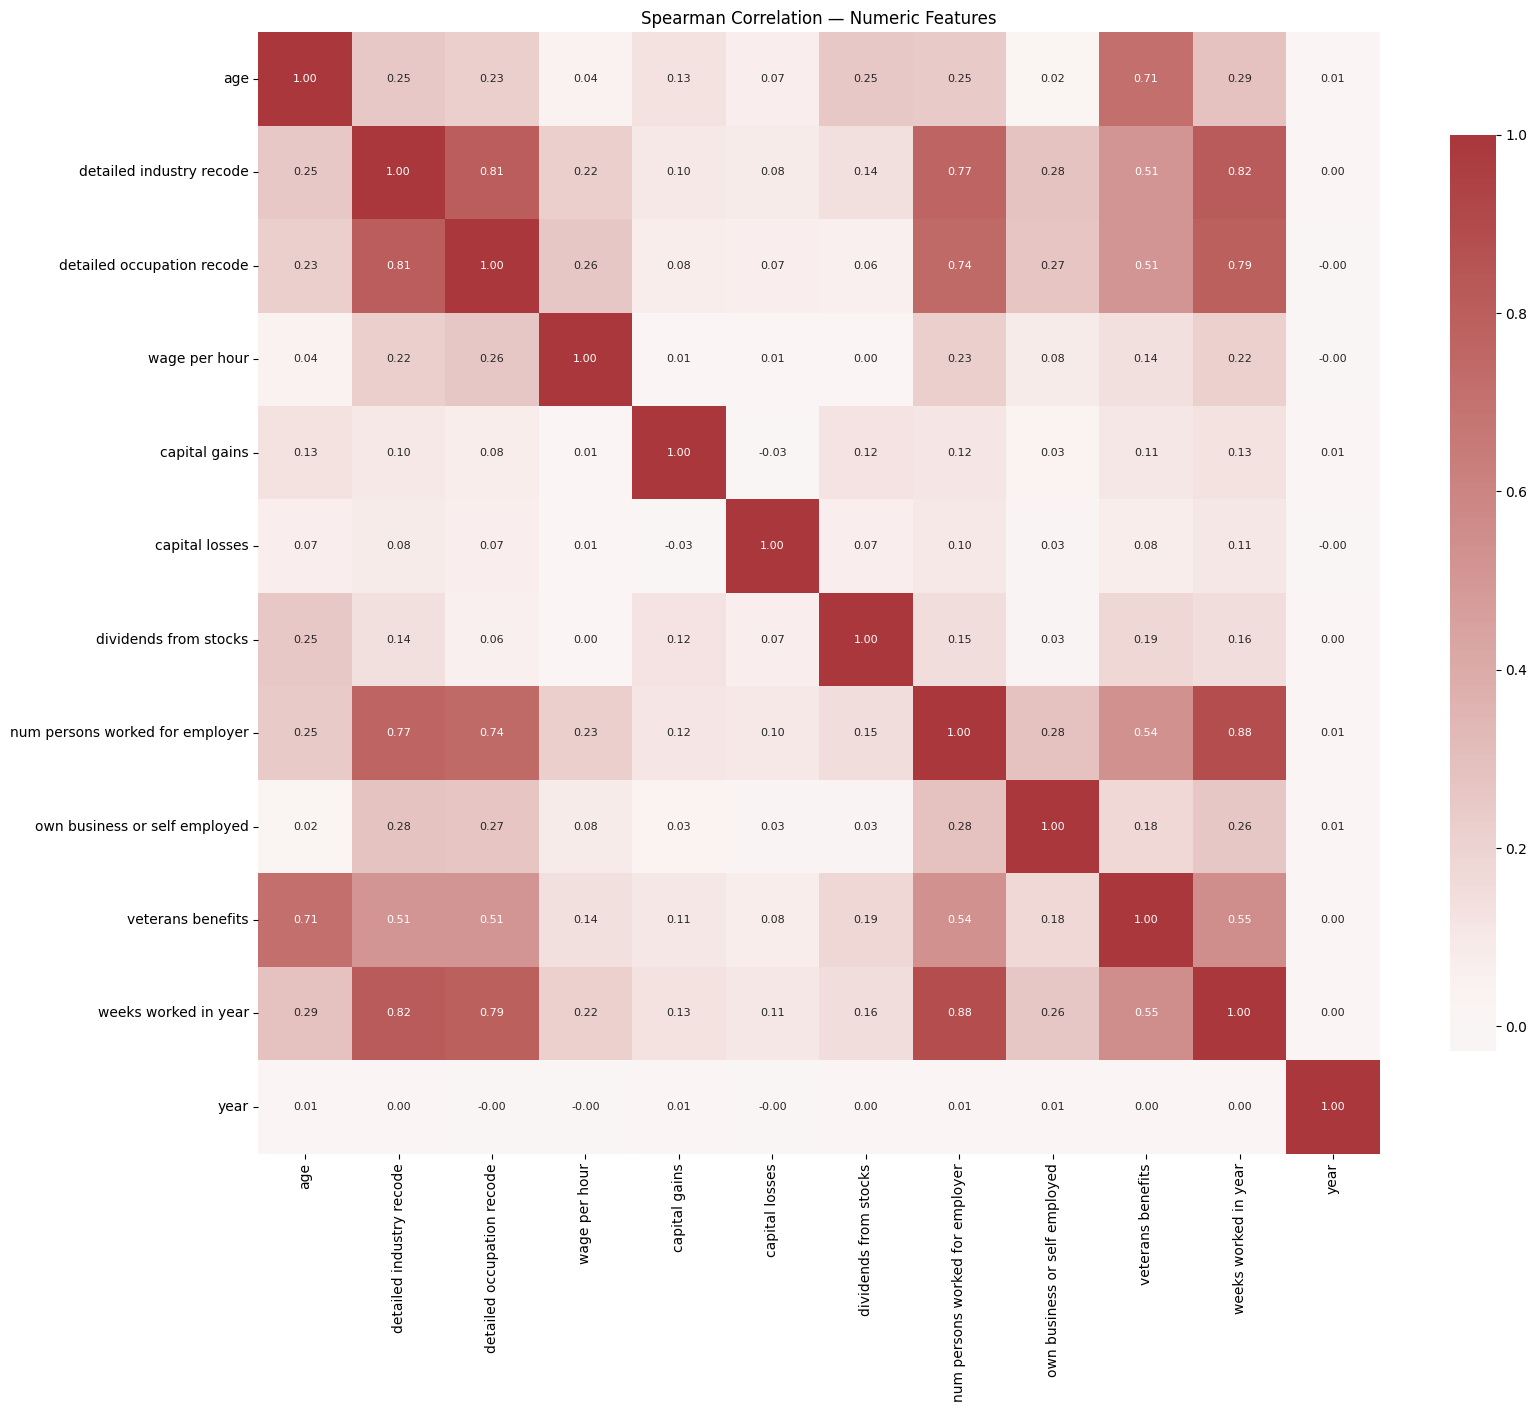

In [21]:
num_cols = census_data.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c != "weight"]  # exclude sample weight

corr = census_data[num_cols].corr(method="spearman")

plt.figure(figsize=(min(22, 0.9*len(num_cols)+6), min(22, 0.9*len(num_cols)+6)))
sns.heatmap(
    corr, cmap="vlag", center=0, square=True, cbar_kws={"shrink": 0.6},
    annot=True, fmt=".2f", annot_kws={"size": 8}
)
plt.title("Spearman Correlation — Numeric Features")
plt.tight_layout(); plt.show()

In [22]:
LABEL_MAP = {"- 50000.": 0, "50000+.": 1, "- 50000": 0, "50000+": 1}
y = census_data["label"].map(LABEL_MAP).astype(float).values
w = census_data["weight"].astype(float).values

def weighted_corr(x, y, w):
    m_x = np.average(x, weights=w)
    m_y = np.average(y, weights=w)
    cov = np.average((x - m_x) * (y - m_y), weights=w)
    var_x = np.average((x - m_x) ** 2, weights=w)
    var_y = np.average((y - m_y) ** 2, weights=w)
    if var_x == 0 or var_y == 0:
        return np.nan
    return cov / np.sqrt(var_x * var_y)

rows = []
for c in num_cols:
    x = census_data[c].astype(float).values
    r = weighted_corr(x, y, w)
    rows.append({"feature": c, "corr_w_label": r, "abs_corr": abs(r)})

corr_rank = pd.DataFrame(rows).sort_values("abs_corr", ascending=False)
corr_rank.head(20)

,feature,corr_w_label,abs_corr
10,weeks worked in year,0.263366,0.263366
4,capital gains,0.239139,0.239139
7,num persons worked for employer,0.220804,0.220804
1,detailed industry recode,0.194429,0.194429
6,dividends from stocks,0.173663,0.173663
5,capital losses,0.148193,0.148193
9,veterans benefits,0.139313,0.139313
0,age,0.138386,0.138386
8,own business or self employed,0.038098,0.038098
3,wage per hour,0.022352,0.022352


In [30]:
(corr_rank["corr_w_label"] < 0).sum(), corr_rank["corr_w_label"].min()

(0, 0.008091403541815116)

In [ ]:
corr_rank = (corr_rank
    .assign(sign=np.where(corr_rank.corr_w_label >= 0, "+", "-"))
    .sort_values("abs_corr", ascending=False)
    [["feature","corr_w_label","abs_corr","sign"]])
corr_rank.head(20)

,feature,corr_w_label,abs_corr,sign
10,weeks worked in year,0.263366,0.263366,+
4,capital gains,0.239139,0.239139,+
7,num persons worked for employer,0.220804,0.220804,+
1,detailed industry recode,0.194429,0.194429,+
6,dividends from stocks,0.173663,0.173663,+
5,capital losses,0.148193,0.148193,+
9,veterans benefits,0.139313,0.139313,+
0,age,0.138386,0.138386,+
8,own business or self employed,0.038098,0.038098,+
3,wage per hour,0.022352,0.022352,+


In [ ]:
# Define feature set (everything except label and weight)
LABEL_COL = "label"
WEIGHT_COL = "weight"
FEATURE_COLS = [c for c in census_data.columns if c not in (LABEL_COL, WEIGHT_COL)]

# identify conflicts/duplicates
g = census_data.groupby(FEATURE_COLS, dropna=False)
conflicting_df = g.filter(lambda x: x[LABEL_COL].nunique() > 1)
duplicate_df   = g.filter(lambda x: (len(x) > 1) and (x[LABEL_COL].nunique() == 1))

print("Total rows:", len(census_data))
print("Conflicting rows:", len(conflicting_df))
print("Duplicate rows:", len(duplicate_df))

# drop conflicts
if len(conflicting_df):
    conflict_keys = conflicting_df[FEATURE_COLS].drop_duplicates()
    conflict_keys["is_conflict"] = True
    df_noconf = census_data.merge(conflict_keys, on=FEATURE_COLS, how="left")
    df_noconf = df_noconf[df_noconf["is_conflict"].isna()].drop(columns=["is_conflict"])
else:
    df_noconf = census_data.copy()

# aggregate duplicates: sum weight, keep label
census_data = (
    df_noconf
    .groupby(FEATURE_COLS, dropna=False)
    .agg(
        label=(LABEL_COL, "first"),
        weight_sum=(WEIGHT_COL, "sum"),
        freq=("label", "size"),
    )
    .reset_index()
)

# Keep a consistent weight column name for downstream code
census_data["weight"] = census_data["weight_sum"]
census_data = census_data.drop(columns=["weight_sum"])

print("Rows after conflict drop & aggregation:", len(census_data))

Total rows: 199523
Conflicting rows: 379
Duplicate rows: 53499
Rows after conflict drop & aggregation: 152718


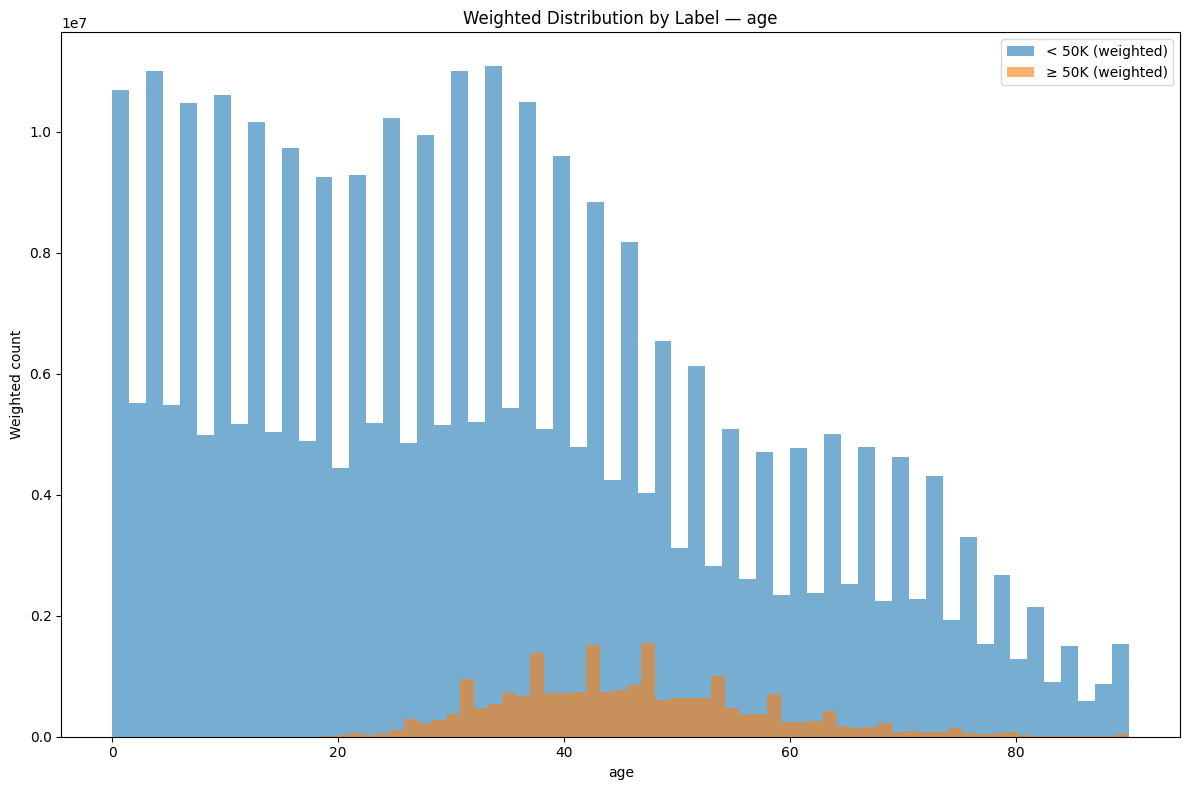

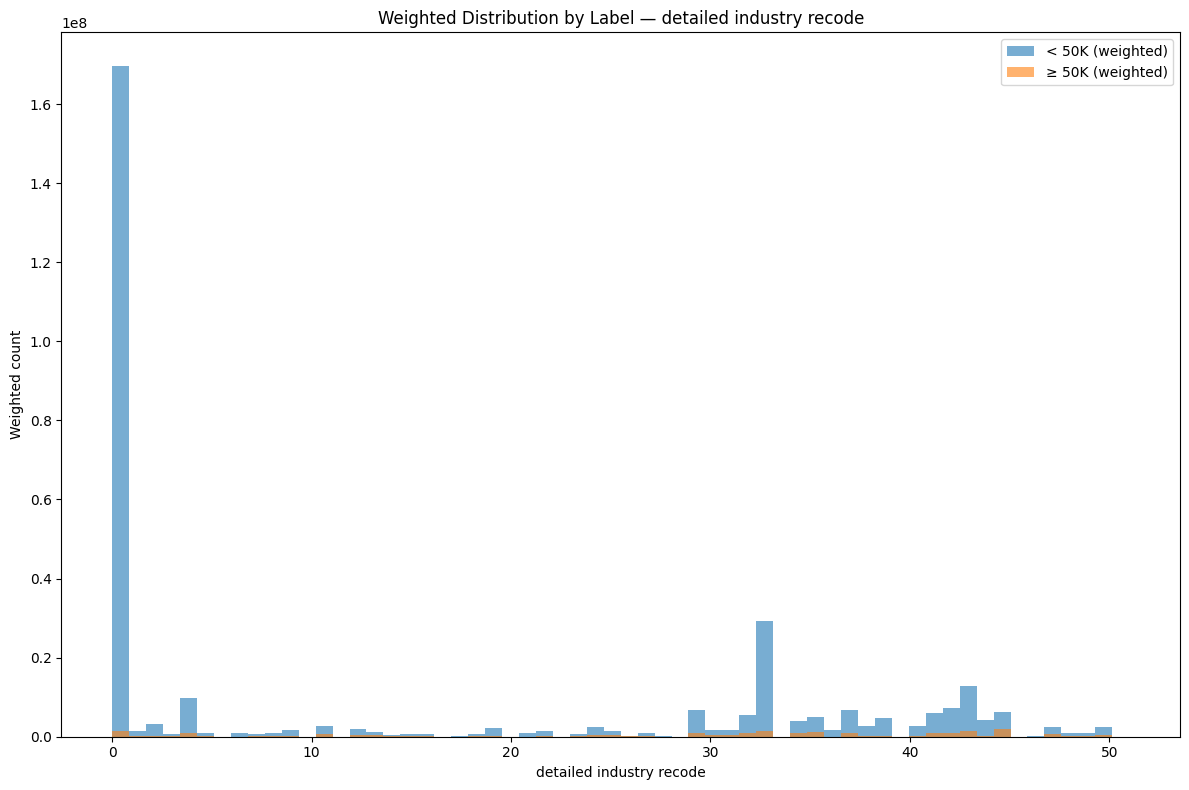

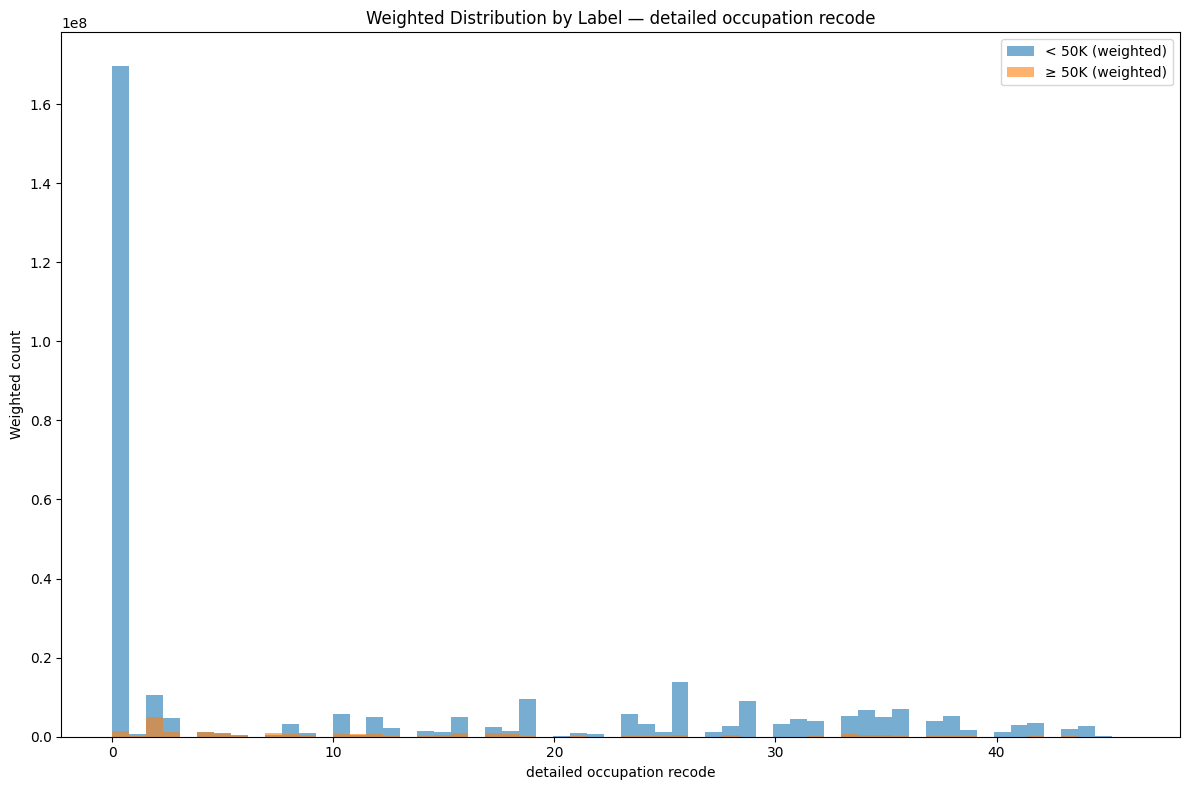

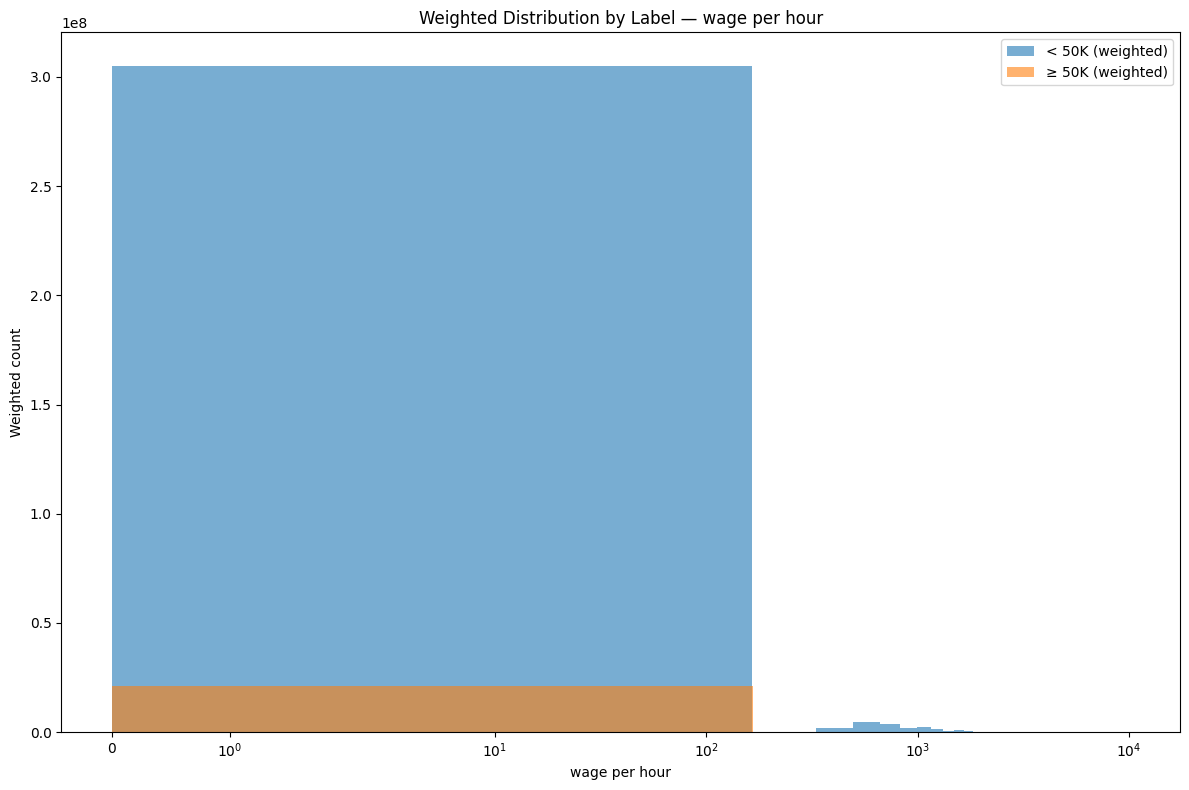

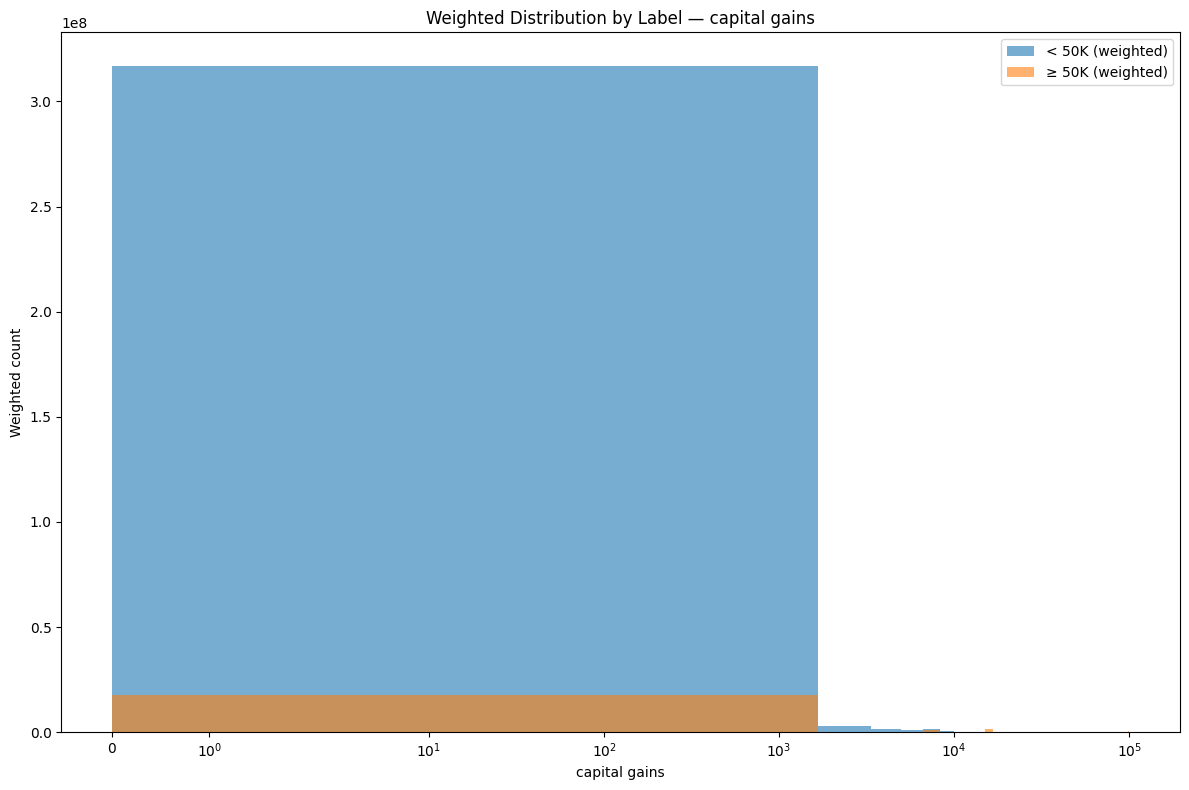

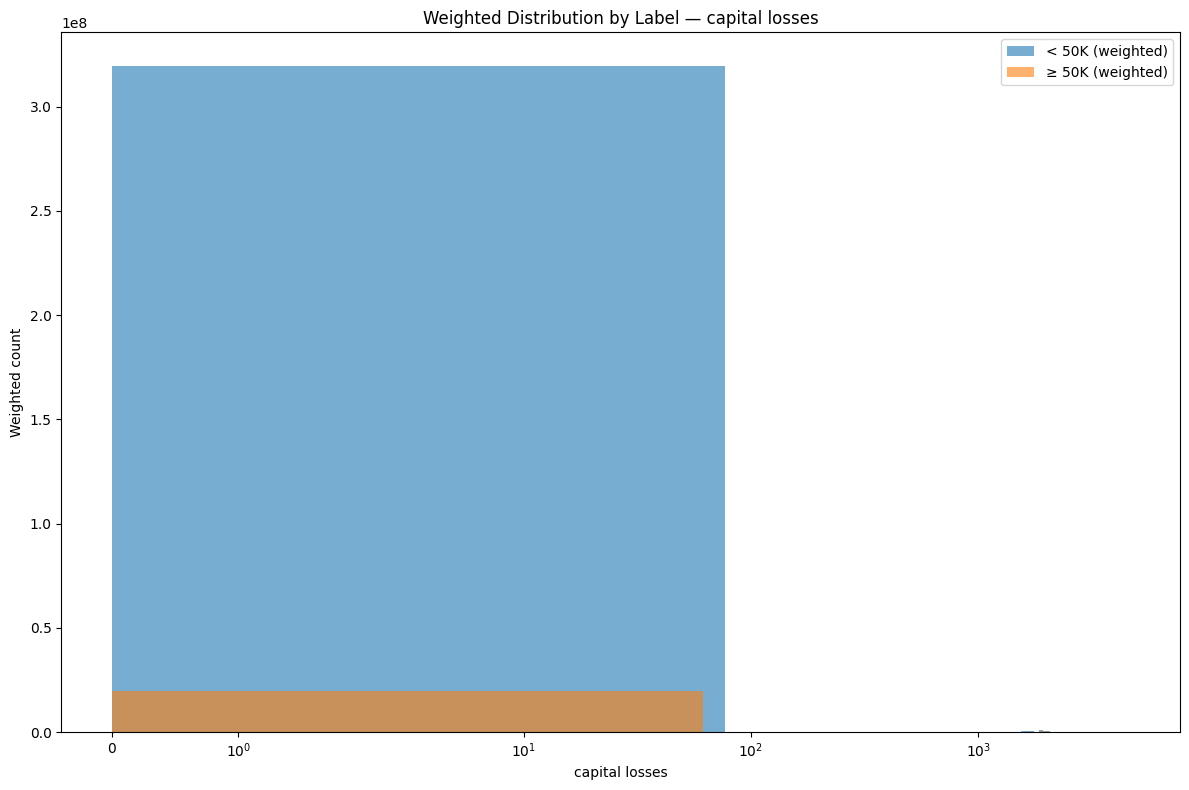

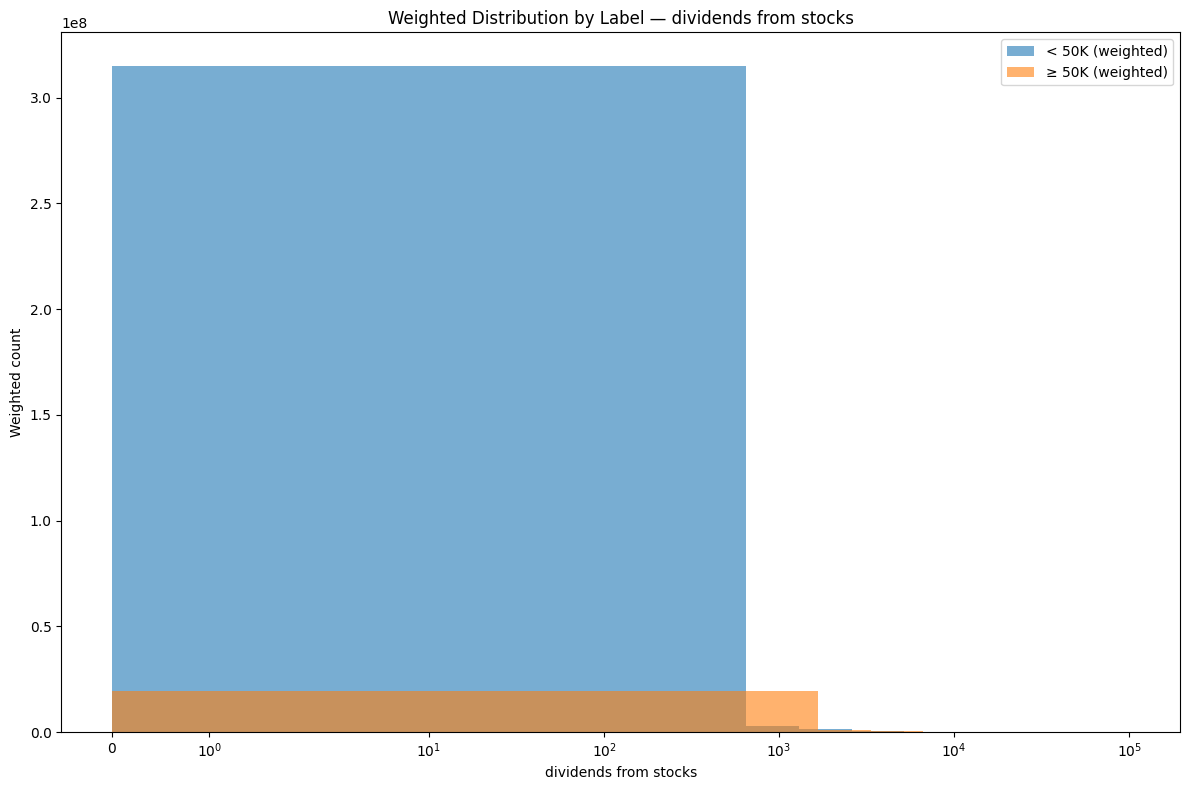

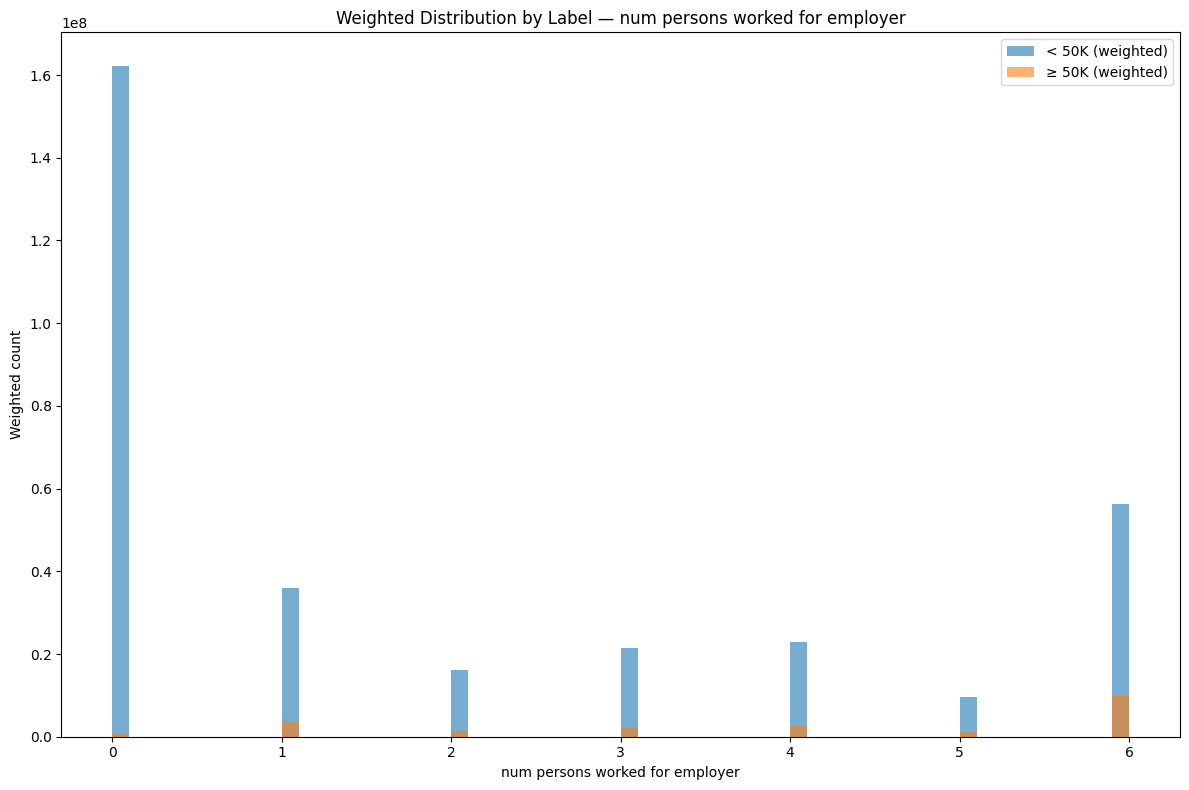

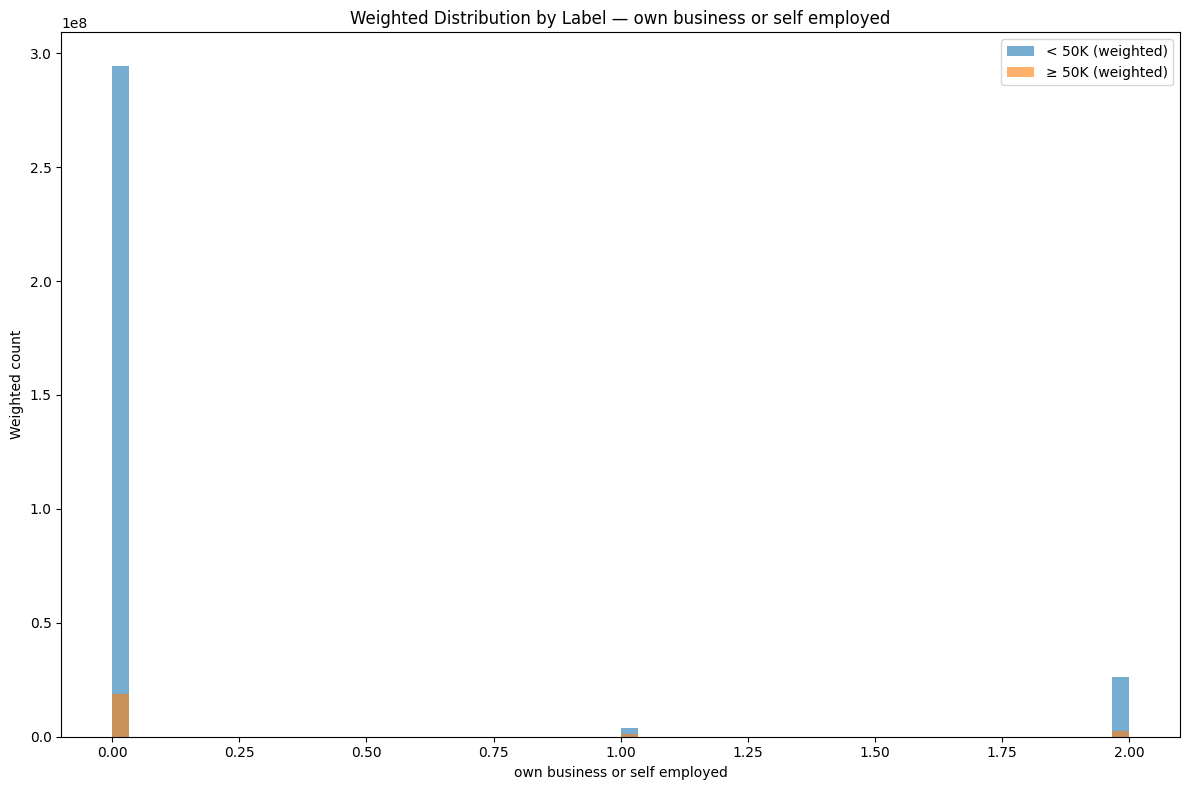

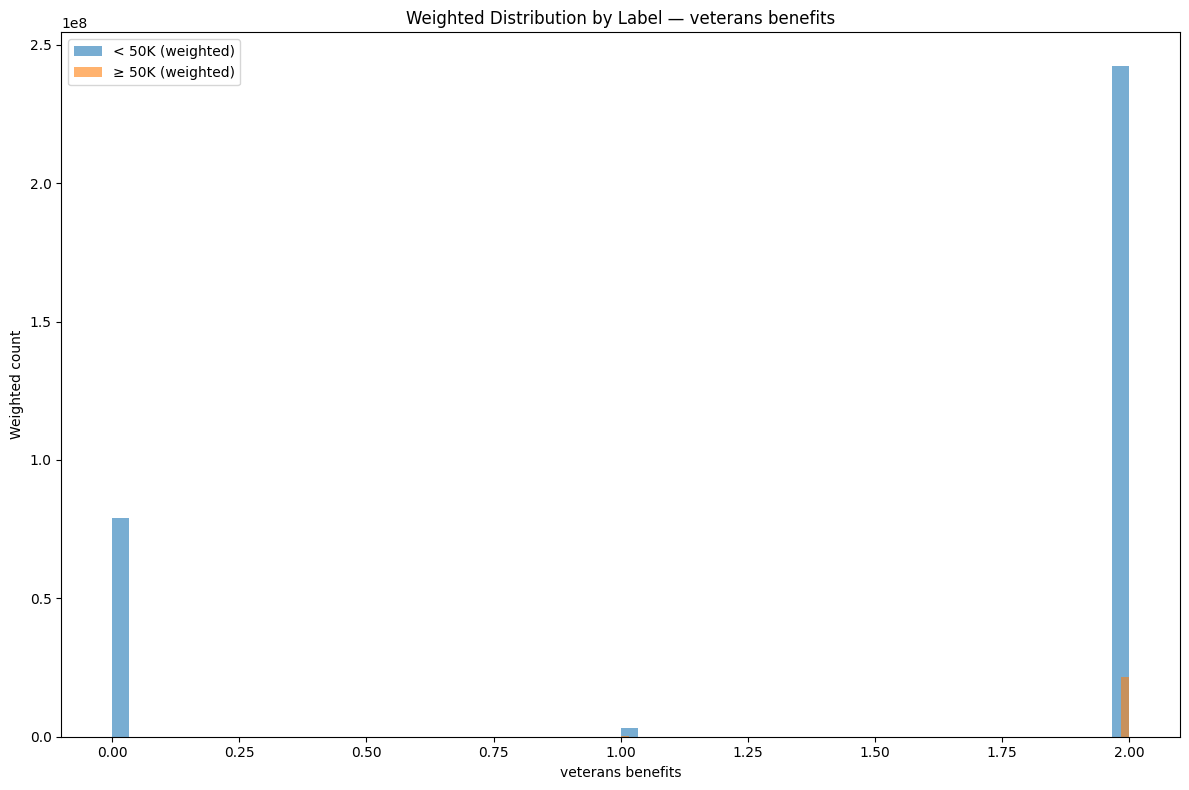

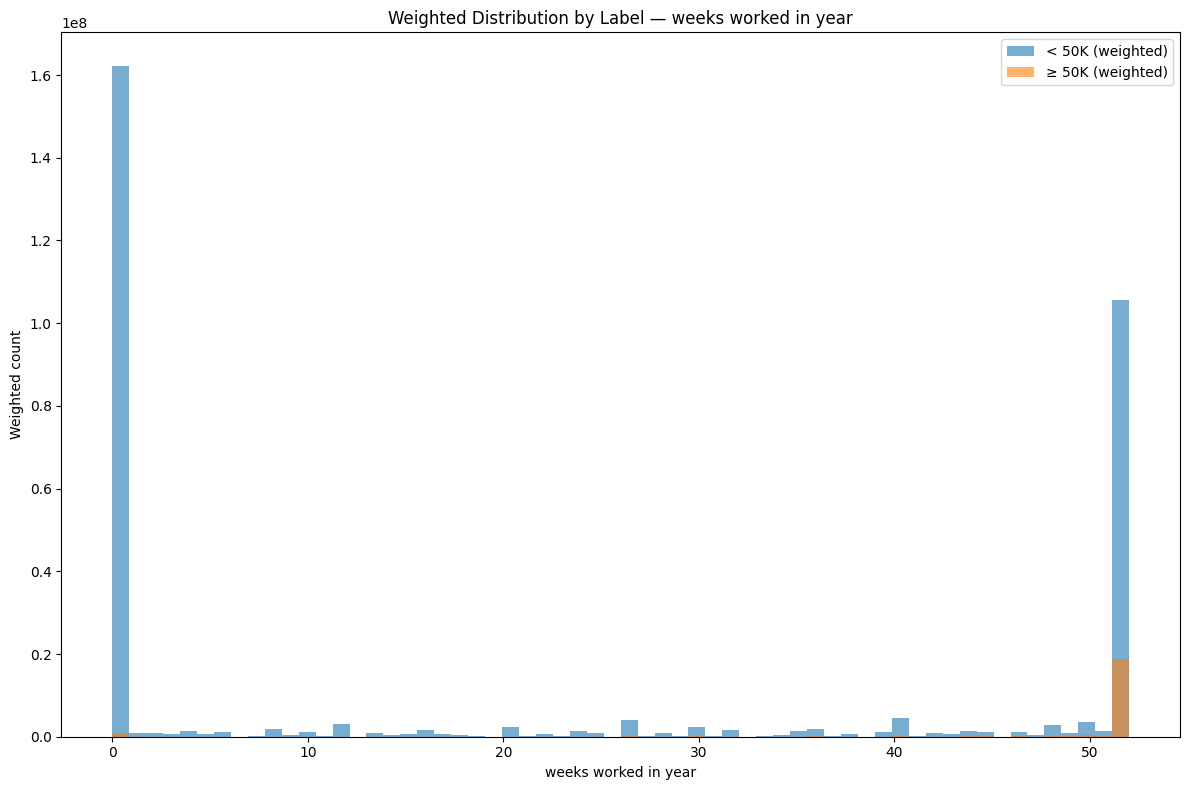

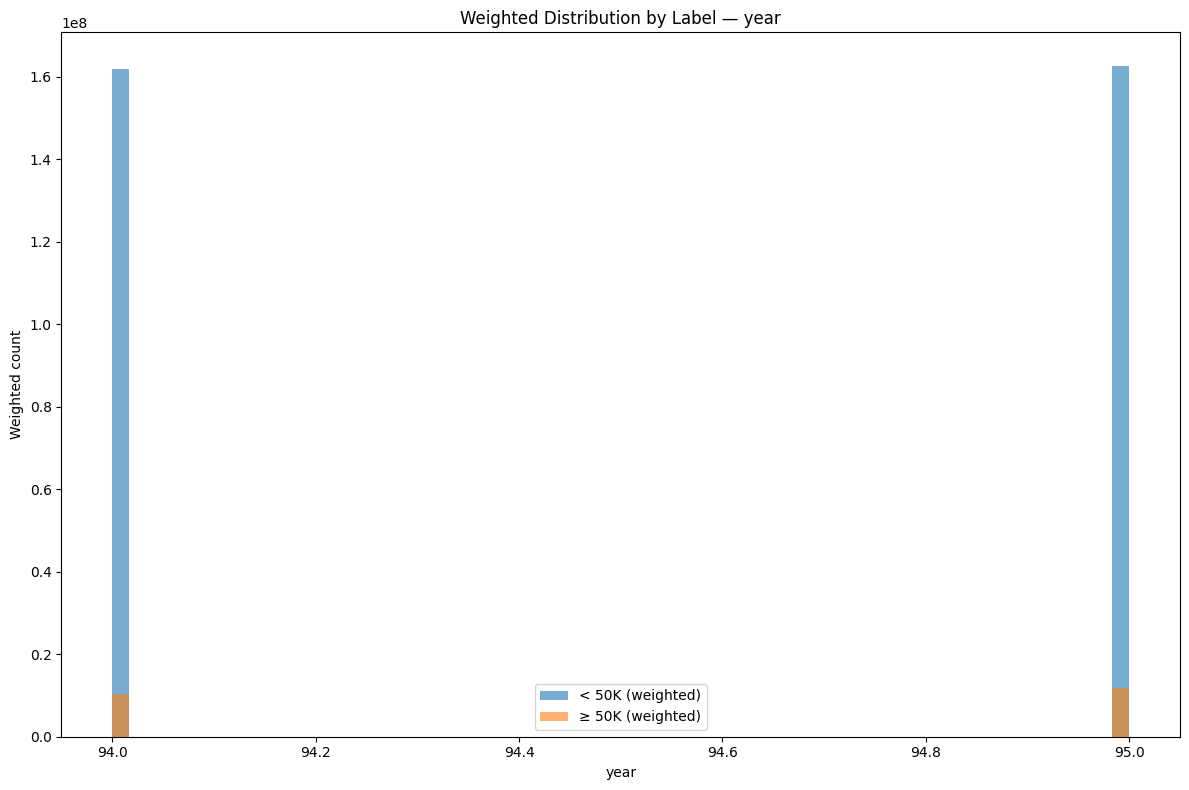

In [33]:
LABEL_MAP = {"- 50000.": 0, "50000+.": 1, "- 50000": 0, "50000+": 1}

def plot_numeric_hist_by_label(df: pd.DataFrame, col: str, bins: int = 60, log_scale: bool = False):
    y = df["label"].map(LABEL_MAP).astype(int)
    m0 = (y == 0); m1 = ~m0
    v0, w0 = df.loc[m0, col].astype(float).values, df.loc[m0, "weight"].astype(float).values
    v1, w1 = df.loc[m1, col].astype(float).values, df.loc[m1, "weight"].astype(float).values

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.hist(v0, bins=bins, weights=w0, alpha=0.6, label="< 50K (weighted)")
    ax.hist(v1, bins=bins, weights=w1, alpha=0.6, label="≥ 50K (weighted)")
    ax.set_title(f"Weighted Distribution by Label — {col}")
    ax.set_xlabel(col); ax.set_ylabel("Weighted count")
    if log_scale: ax.set_xscale("symlog")
    ax.legend(); plt.tight_layout(); plt.show()

num_cols = census_data.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c not in {"weight", "freq"}]

for c in num_cols:
    plot_numeric_hist_by_label(
        census_data, c, bins=60,
        log_scale=c in {"capital gains", "capital losses", "dividends from stocks", "wage per hour"}
    )

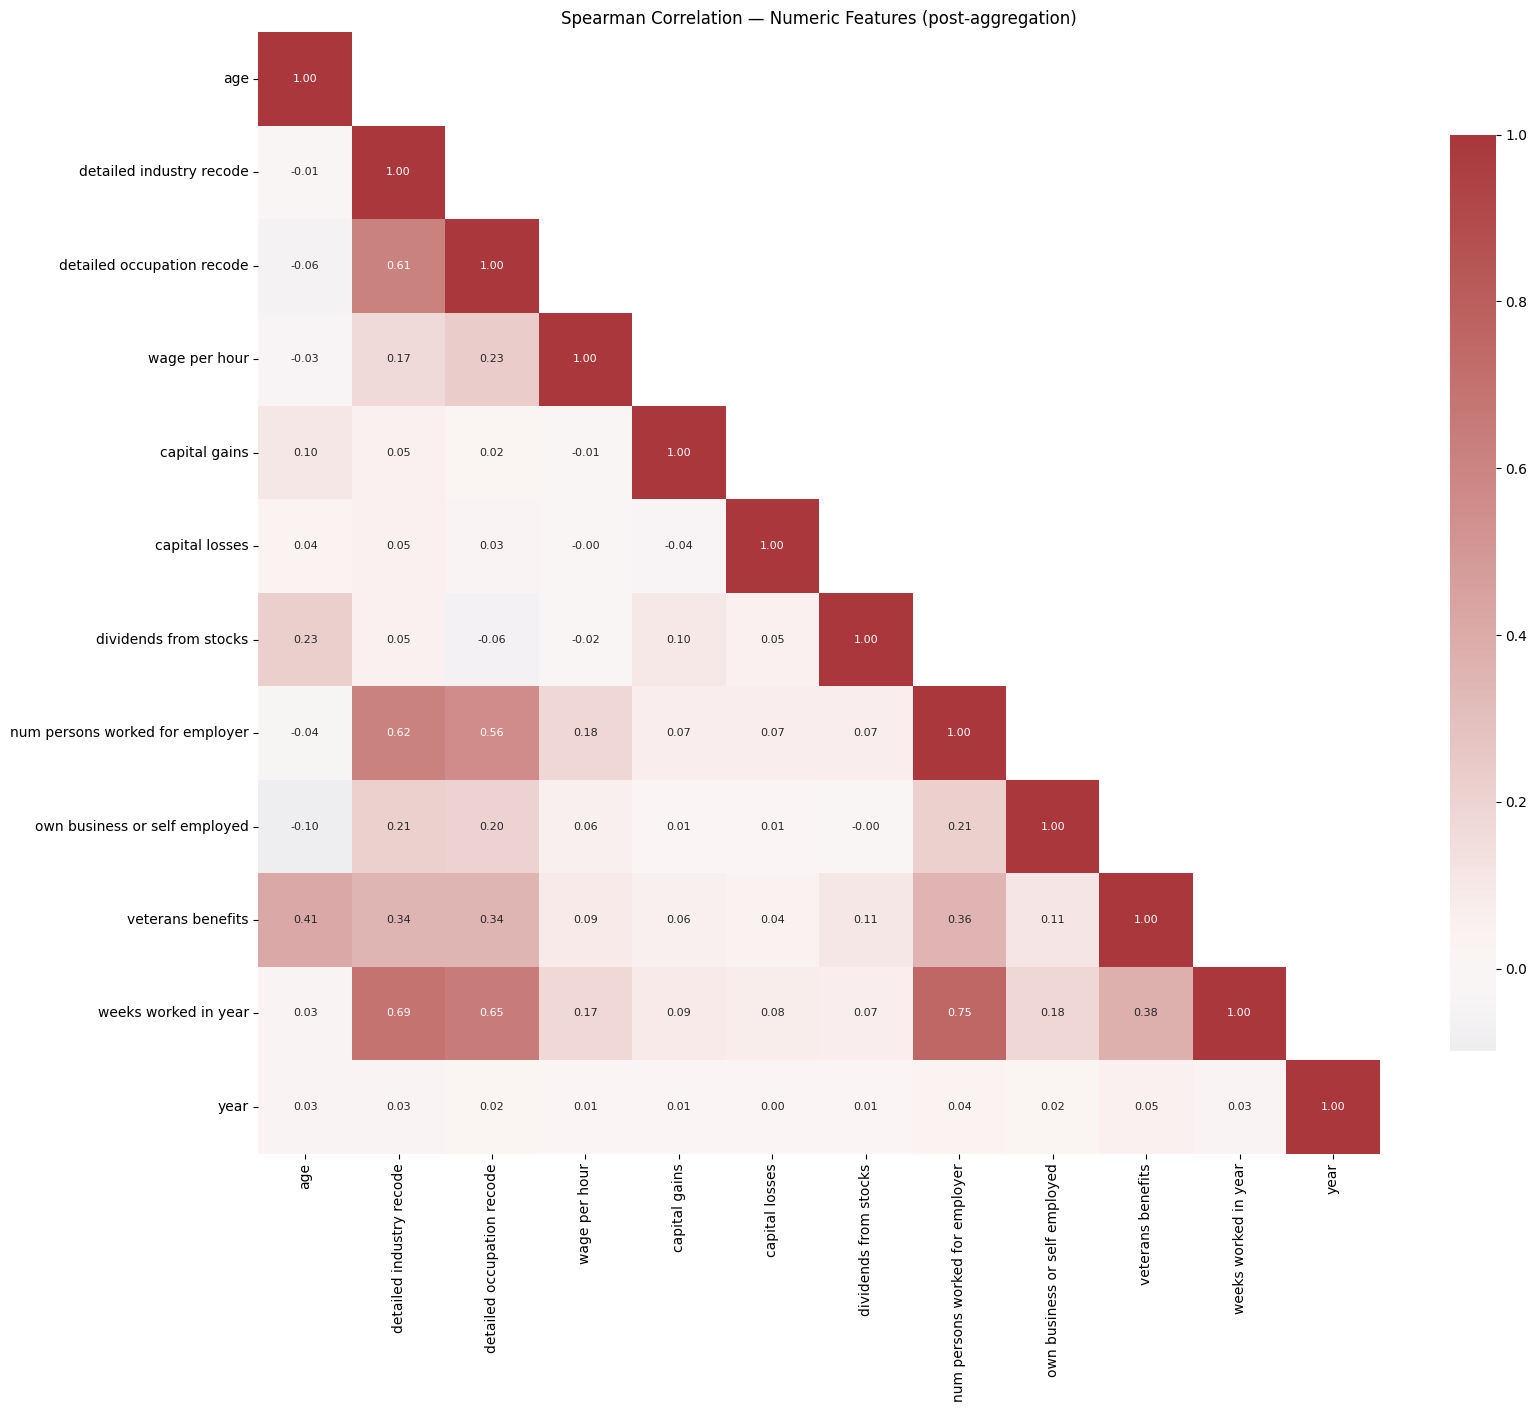

In [34]:
num_cols = census_data.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c not in {"weight", "freq"}]

corr = census_data[num_cols].corr(method="spearman")
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

plt.figure(figsize=(min(22, 0.9*len(num_cols)+6), min(22, 0.9*len(num_cols)+6)))
sns.heatmap(
    corr, mask=mask, cmap="vlag", center=0, square=True, cbar_kws={"shrink": 0.6},
    annot=True, fmt=".2f", annot_kws={"size": 8}
)
plt.title("Spearman Correlation — Numeric Features (post-aggregation)")
plt.tight_layout(); plt.show()

In [35]:
y = census_data["label"].map(LABEL_MAP).astype(float).values
w = census_data["weight"].astype(float).values

def weighted_corr(x, y, w):
    mx, my = np.average(x, weights=w), np.average(y, weights=w)
    cov = np.average((x-mx)*(y-my), weights=w)
    vx  = np.average((x-mx)**2, weights=w)
    vy  = np.average((y-my)**2, weights=w)
    return np.nan if (vx == 0 or vy == 0) else cov / np.sqrt(vx * vy)

rows = []
for c in num_cols:
    x = census_data[c].astype(float).values
    r = weighted_corr(x, y, w)
    rows.append({"feature": c, "corr_w_label": r, "abs_corr": abs(r)})

corr_rank = pd.DataFrame(rows).sort_values("abs_corr", ascending=False)
corr_rank.head(20)

,feature,corr_w_label,abs_corr
10,weeks worked in year,0.264435,0.264435
4,capital gains,0.240141,0.240141
7,num persons worked for employer,0.221740,0.221740
1,detailed industry recode,0.195651,0.195651
6,dividends from stocks,0.174435,0.174435
5,capital losses,0.148938,0.148938
9,veterans benefits,0.139049,0.139049
0,age,0.137697,0.137697
8,own business or self employed,0.038641,0.038641
3,wage per hour,0.022738,0.022738


In [128]:

col = "family members under 18"

print("RAW UNIQUE VALUES:")
print(census_data[col].drop_duplicates().sort_values().to_list())


RAW UNIQUE VALUES:
['Both parents present', 'Father only present', 'Mother only present', 'Neither parent present', 'Not in universe']


In [129]:

tmp = (
    census_data
    .groupby(col, dropna=False)
    .agg(
        n=("label", "size"),
        weight_pop=("weight", "sum"),
    )
    .sort_values("weight_pop", ascending=False)
)

pd.set_option("display.max_rows", 200)
print(tmp)


                              n    weight_pop
family members under 18                      
Not in universe          134781  2.540803e+08
Both parents present      10863  6.432913e+07
Mother only present        5137  2.202763e+07
Father only present        1028  3.151753e+06
Neither parent present      909  3.008288e+06


In [130]:
LABEL_MAP = {"- 50000.": 0, "50000+.": 1, "- 50000": 0, "50000+": 1}

df = census_data.copy()
df["y"] = df["label"].map(LABEL_MAP).astype(int)

rate = (
    df
    .groupby(col, dropna=False)
    .apply(lambda g: (g["weight"] * g["y"]).sum() / g["weight"].sum())
    .rename("weighted_pos_rate")
    .sort_values(ascending=False)
)

print(rate)


family members under 18
Not in universe           0.086862
Both parents present      0.000055
Father only present       0.000000
Mother only present       0.000000
Neither parent present    0.000000
Name: weighted_pos_rate, dtype: float64


# Modeling / Classification

In [ ]:
# y, features X, and sample weights
LABEL_MAP = {"- 50000.": 0, "50000+.": 1, "- 50000": 0, "50000+": 1}

# binary target
y = census_data["label"].map(LABEL_MAP).astype(int)

# census / survey weights
w = census_data["weight"].astype(float)


# feature set = everything except label, weight, freq
feature_exclude = {"label", "weight", "freq"}
FEATURE_COLS = [c for c in census_data.columns if c not in feature_exclude]
X = census_data[FEATURE_COLS]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val, w_train, w_val = train_test_split(
    X, y, w,
    test_size=0.2,
    random_state=42,
    stratify=y,
)


# quick sanity
X_train.shape, X_val.shape

((122174, 40), (30544, 40))

## Logistic Regression Baseline

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# baseline: OHE + StandardScaler + LogisticRegression

cat_cols = [c for c in FEATURE_COLS if X_train[c].dtype == "object"]
num_cols = [c for c in FEATURE_COLS if c not in cat_cols]


# preprocessing: OHE for cats, scale for nums

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
        ("num", StandardScaler(), num_cols),
    ],
    sparse_threshold=0.0,
)

# simple weighted logistic regression
log_reg = LogisticRegression(max_iter=300, solver="lbfgs")

clf = Pipeline(steps=[("prep", preprocess), ("model", log_reg)])
clf.fit(X_train, y_train, model__sample_weight=w_train) #  pass weights through pipeline

,steps,"[('prep', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.0
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report

# get validation preds from the baseline pipeline
p_val = clf.predict_proba(X_val)[:, 1]

# unweighted metrics 
print("PR-AUC (unweighted):", round(average_precision_score(y_val, p_val), 4))
print("ROC-AUC (unweighted):", round(roc_auc_score(y_val, p_val), 4))

#weighted metrics
print("PR-AUC (weighted):  ", round(average_precision_score(y_val, p_val, sample_weight=w_val), 4))
print("ROC-AUC (weighted): ", round(roc_auc_score(y_val, p_val, sample_weight=w_val), 4))

# default 0.5 snapshot – not optimal for PR-AUC, but good for a quick sense
y_hat = (p_val >= 0.5).astype(int)
print("\nClassification report @0.5 (unweighted):\n")
print(classification_report(y_val, y_hat, digits=4))

PR-AUC (unweighted): 0.5957
ROC-AUC (unweighted): 0.9244
PR-AUC (weighted):   0.6007
ROC-AUC (weighted):  0.9399

Classification report @0.5 (unweighted):

              precision    recall  f1-score   support

           0     0.9497    0.9857    0.9674     28088
           1     0.7117    0.4031    0.5147      2456

    accuracy                         0.9389     30544
   macro avg     0.8307    0.6944    0.7410     30544
weighted avg     0.9306    0.9389    0.9310     30544



In [ ]:
# inspect learned coefficients

ohe = clf.named_steps["prep"].named_transformers_["cat"]
num_names = np.array(num_cols)
cat_names = ohe.get_feature_names_out(cat_cols)

# final feature name order in the model
feat_names = np.r_[cat_names, num_names]


# model coefficients
coefs = clf.named_steps["model"].coef_.ravel()
coef_df = pd.DataFrame({"feature": feat_names, "coef": coefs}).sort_values("coef", ascending=False)

display(coef_df.head(20))      # strongest positive association with >50K
display(coef_df.tail(20))      # strongest negative association with >50K

,feature,coef
20,education_Doctorate degree(PhD EdD),2.348679
24,education_Prof school degree (MD DDS DVM LLB JD),2.221002
63,major occupation code_Farming forestry and fis...,1.574810
23,education_Masters degree(MA MS MEng MEd MSW MBA),1.457145
37,major industry code_Armed Forces,1.444770
61,major occupation code_Armed Forces,1.444770
49,major industry code_Mining,1.297063
353,country of birth self_England,1.252566
208,detailed household and family stat_Spouse of R...,1.249335
366,country of birth self_Italy,1.199713


,feature,coef
3,class of worker_Not in universe,-0.852271
8,class of worker_Without pay,-0.882520
293,country of birth father_Scotland,-0.898116
90,sex_Female,-0.924333
14,education_7th and 8th grade,-0.941452
41,major industry code_Education,-0.954085
145,state of previous residence_Mississippi,-0.957107
13,education_5th or 6th grade,-0.993137
60,major occupation code_Adm support including cl...,-1.010575
394,fill inc questionnaire for veteran's admin_Not...,-1.032352


The baseline logistic model behaves sensibly overall:

Higher education levels have large positive coefficients (Doctorate, Professional school, Master’s, Bachelor’s), confirming that education is one of the strongest single predictors of income ≥ 50K in this dataset.

Work intensity also matters: weeks worked in year has a strong positive weight, meaning full-year workers are much more likely to be in the higher income group.

Being self-employed and incorporated is also positively associated with higher income.

On the other hand, categories that essentially mean “this person is not really in the labor force” (class of worker_Not in universe, class of worker_Without pay) get large negative coefficients, as do low education levels (5th–8th grade, less than 1st grade).

A few one-hot categories (e.g. specific countries of birth such as England or Italy) show relatively high positive coefficients. These are most likely small, clean subgroups in the sample that happen to align with high income, rather than a true causal signal. This is a known artifact of one-hot + logistic regression on wide categorical data.

One notable point is that sex_Female receives a negative coefficient. This reflects historical income patterns in the data rather than a modeling choice; in a production setting we would call this out under fairness / bias considerations.

Overall, this baseline model is doing what we wanted: it picks up the obvious socioeconomic signals and gives us a transparent reference point before moving to CatBoost.

## CatBoost baseline

In [41]:
from catboost import CatBoostClassifier, Pool

# Categorical features = object dtype
cat_cols_cb = [c for c in FEATURE_COLS if X_train[c].dtype == "object"]
cat_idx_cb  = [X_train.columns.get_loc(c) for c in cat_cols_cb]

train_pool = Pool(X_train, label=y_train, weight=w_train, cat_features=cat_idx_cb)
val_pool   = Pool(X_val,   label=y_val,   weight=w_val,   cat_features=cat_idx_cb)

We know that the pipeline works now we switch to CatBoost, which can handle high-cardinality categorical features (No OHE needed). 

We:

- detect categorical columns by object dtype and pass their indices to CatBoost,

- build training/validation Pools with sample weights, and

- train a 3000-iteration model with early stopping.
    We also tell CatBoost to monitor weighted PR-AUC so that its internal metric matches the metric we report with scikit-learn.
    On the same 20% validation split this should outperform the logistic baseline, especially on PR-AUC, because CatBoost can learn interactions (e.g. occupation × industry × weeks worked).

In [42]:
from sklearn.metrics import roc_auc_score, average_precision_score

cb = CatBoostClassifier(
    depth=7,
    learning_rate=0.045,
    l2_leaf_reg=3.0,
    iterations=3000,
    loss_function="Logloss",
    eval_metric="PRAUC",
    random_seed=42,
    early_stopping_rounds=200,
    verbose=200,
)

cb.fit(train_pool, eval_set=val_pool, use_best_model=True)

p_val_cb = cb.predict_proba(val_pool)[:, 1]

print("CATBOOST PR-AUC (unweighted):", round(average_precision_score(y_val, p_val_cb), 4))
print("CATBOOST ROC-AUC (unweighted):", round(roc_auc_score(y_val, p_val_cb), 4))
print("CATBOOST PR-AUC (weighted):  ", round(average_precision_score(y_val, p_val_cb, sample_weight=w_val), 4))
print("CATBOOST ROC-AUC (weighted): ", round(roc_auc_score(y_val, p_val_cb, sample_weight=w_val), 4))

0:	learn: 0.1201046	test: 0.1466751	best: 0.1466751 (0)	total: 284ms	remaining: 14m 11s
200:	learn: 0.5740439	test: 0.5626400	best: 0.5626400 (200)	total: 13.5s	remaining: 3m 7s
400:	learn: 0.6791012	test: 0.6503294	best: 0.6503294 (400)	total: 31.1s	remaining: 3m 21s
600:	learn: 0.7211320	test: 0.6745074	best: 0.6745074 (600)	total: 53.6s	remaining: 3m 33s
800:	learn: 0.7405865	test: 0.6793882	best: 0.6794656 (794)	total: 1m 16s	remaining: 3m 30s
1000:	learn: 0.7551932	test: 0.6828961	best: 0.6828961 (1000)	total: 1m 39s	remaining: 3m 18s
1200:	learn: 0.7662399	test: 0.6854991	best: 0.6855176 (1189)	total: 2m 1s	remaining: 3m 2s
1400:	learn: 0.7764478	test: 0.6860181	best: 0.6863147 (1353)	total: 2m 24s	remaining: 2m 45s
1600:	learn: 0.7856655	test: 0.6874297	best: 0.6874917 (1598)	total: 2m 47s	remaining: 2m 26s
1800:	learn: 0.7931945	test: 0.6880872	best: 0.6881740 (1797)	total: 3m 10s	remaining: 2m 6s
2000:	learn: 0.8003390	test: 0.6883767	best: 0.6885638 (1911)	total: 3m 33s	remai

In [ ]:
# Feature Importance for the CatBoost model
fi = pd.Series(cb.get_feature_importance(train_pool), index=X_train.columns).sort_values(ascending=False)
fi

family members under 18                       34.374861
age                                           11.542638
num persons worked for employer                4.387019
dividends from stocks                          4.080258
education                                      3.995383
sex                                            3.791046
veterans benefits                              3.780463
weeks worked in year                           3.568732
major occupation code                          3.543924
capital gains                                  2.579221
enroll in edu inst last wk                     2.391902
detailed household summary in household        2.293155
detailed industry recode                       2.182686
detailed occupation recode                     1.869137
tax filer stat                                 1.869011
class of worker                                1.830624
major industry code                            1.572305
capital losses                                 1

Compared to the linear baseline, CatBoost produced a cleaner importance ordering, without spurious one-hot artifacts from rare country-of-birth categories.

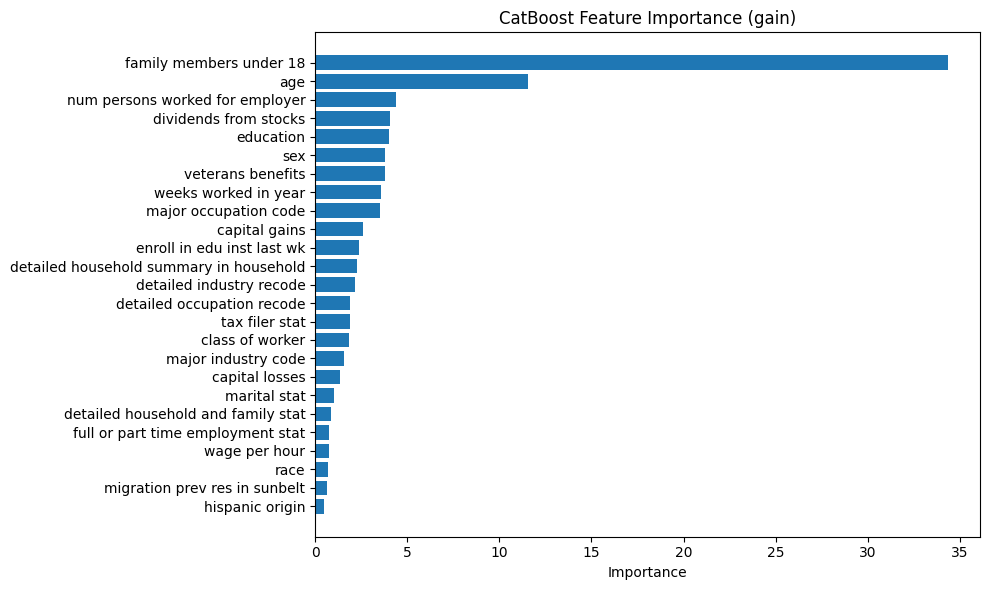

In [ ]:
fi_top = fi.head(25) 

plt.figure(figsize=(10, 6))
plt.barh(fi_top.index, fi_top.values)
plt.gca().invert_yaxis()  # biggest at the top
plt.title("CatBoost Feature Importance (gain)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


The CatBoost model puts very high weight on household / family structure (family members under 18) and age. This is reasonable for an income-prediction task on census data, people in their prime working years who are supporting dependents tend to show up more in the ≥50K group.  
After that, the model relies on a set of work and human-capital features (num persons worked for employer, dividends from stocks, education, weeks worked in year, major occupation code). These are exactly the signals we identified in EDA.  
Lower down the list we see administrative / migration fields (migration code-change in msa, state of previous residence, year) with very small importance. This tells us the model is not overfitting to survey mechanics but to actual socioeconomic drivers.  
Overall, the tree model’s importance profile is more plausible than the linear model’s coefficient ranking, which sometimes elevated very rare one-hot categories.

In [ ]:
best_it = cb.get_best_iteration()
best_scores = cb.get_best_score()  
print("Best iteration:", best_it)
print("Best validation PRAUC:", round(best_scores["validation"]["PRAUC"], 6))

Best iteration: 2047
Best validation PRAUC: 0.688585


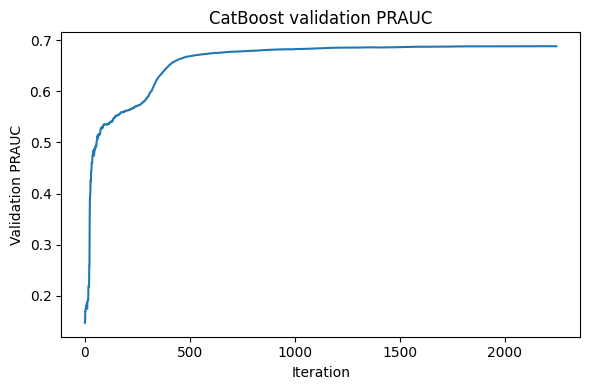

In [45]:
er = cb.get_evals_result()
val_pr = er["validation"]["PRAUC"]
plt.figure(figsize=(6,4))
plt.plot(val_pr); plt.xlabel("Iteration"); plt.ylabel("Validation PRAUC")
plt.title("CatBoost validation PRAUC"); plt.tight_layout(); plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve, confusion_matrix, average_precision_score
import numpy as np

# PR curve using weighted data
prec, rec, thr = precision_recall_curve(y_val, p_val_cb, sample_weight=w_val)
# F1 on each point of the curve
f1 = 2 * prec * rec / (prec + rec + 1e-12)
best_idx = int(np.nanargmax(f1[1:])) + 1          # align with thresholds
best_th = float(thr[best_idx - 1])

y_hat = (p_val_cb >= best_th).astype(int)
cm_w = confusion_matrix(y_val, y_hat, sample_weight=w_val, labels=[0, 1])

print("Best threshold (weighted F1):", round(best_th, 4))
print("Best weighted F1:", round(float(f1[best_idx]), 4))
print("Weighted PR-AUC:", round(average_precision_score(y_val, p_val_cb, sample_weight=w_val), 4))
print("Weighted confusion matrix [TN FP; FN TP]:\n", cm_w)

Best threshold (weighted F1): 0.3513
Best weighted F1: 0.6207
Weighted PR-AUC: 0.6887
Weighted confusion matrix [TN FP; FN TP]:
 [[61042427.48000025  1379449.07      ]
 [ 1788716.93        2591591.39      ]]


Because the dataset is imbalanced, the default 0.5 cutoff is not optimal.  
We build a precision–recall curve with sample weights and pick the threshold that maximizes weighted F1.  
For this CatBoost model, the best threshold is around 0.35 (≈0.3513), which gives a weighted F1 ≈ 0.62 and the same weighted PR-AUC we saw earlier (~0.689 on the single validation split).  
This also gives us a weighted confusion matrix we can show to the client.  

In [47]:
from pathlib import Path
import pandas as pd

Path("models").mkdir(exist_ok=True)
cb.save_model("models/catboost_prauc_best.cbm")

val_preds = pd.DataFrame({"p": p_val_cb, "y": y_val.values, "w": w_val.values}, index=X_val.index)
val_preds.to_csv("tables/val_preds_catboost.csv", index=False)

In [48]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import average_precision_score
from catboost import CatBoostClassifier, Pool
import numpy as np

def cv_catboost_pr_auc(X, y, w, cat_cols, n_splits=5, random_state=42):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    cat_idx = [X.columns.get_loc(c) for c in cat_cols]
    scores = []
    for i, (tr, va) in enumerate(skf.split(X, y), 1):
        Xtr, Xva = X.iloc[tr], X.iloc[va]
        ytr, yva = y.iloc[tr], y.iloc[va]
        wtr, wva = w.iloc[tr], w.iloc[va]

        train_pool = Pool(Xtr, label=ytr, weight=wtr, cat_features=cat_idx)
        val_pool   = Pool(Xva, label=yva, weight=wva, cat_features=cat_idx)

        cb = CatBoostClassifier(
            depth=7, learning_rate=0.045, l2_leaf_reg=3.0,
            iterations=3000, loss_function="Logloss", eval_metric="PRAUC",
            random_seed=42, early_stopping_rounds=200, verbose=False,
        )
        cb.fit(train_pool, eval_set=val_pool, use_best_model=True)
        p = cb.predict_proba(val_pool)[:, 1]
        pr_w = average_precision_score(yva, p, sample_weight=wva)
        scores.append(pr_w)
        print(f"Fold {i}: weighted PR-AUC = {pr_w:.4f}")

    scores = np.array(scores)
    print(f"\nCV mean PR-AUC = {scores.mean():.4f}  (± {scores.std(ddof=1):.4f})")
    return scores

cat_cols_cb = [c for c in FEATURE_COLS if X[c].dtype == "object"]
cv_scores = cv_catboost_pr_auc(X, y, w, cat_cols_cb, n_splits=5, random_state=42)

Fold 1: weighted PR-AUC = 0.7023
Fold 2: weighted PR-AUC = 0.6947
Fold 3: weighted PR-AUC = 0.6976
Fold 4: weighted PR-AUC = 0.6945
Fold 5: weighted PR-AUC = 0.6976

CV mean PR-AUC = 0.6973  (± 0.0032)


In [49]:
print("census_data.shape:", census_data.shape)
print("Has 'freq' column (aggregated view)?", "freq" in census_data.columns)

census_data.shape: (152718, 43)
Has 'freq' column (aggregated view)? True


In [50]:
LABEL_MAP = {"- 50000.": 0, "50000+.": 1, "- 50000": 0, "50000+": 1}

df_raw = census_data.copy()
FEATURE_COLS = [c for c in df_raw.columns if c not in ("label", "weight", "freq")]

g = (
    df_raw
    .groupby(FEATURE_COLS, dropna=False, as_index=False)  # keep NaN groups
    .agg(
        label_min=("label", "min"),
        label_max=("label", "max"),
        weight_sum=("weight", "sum"),
        n_rows=("label", "size"),
    )
)

clean = g[g["label_min"] == g["label_max"]].copy()
clean["label"] = clean["label_min"].map(LABEL_MAP).astype(int)

X_clean = clean[FEATURE_COLS].copy()
y_clean = clean["label"]
w_clean = clean["weight_sum"].astype(float)

cat_cols = [c for c in FEATURE_COLS if X_clean[c].dtype == "object"]
cat_idx  = [X_clean.columns.get_loc(c) for c in cat_cols]

In [54]:
X_clean.shape

X_clean.head(10)

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year
0,0,Not in universe,0,0,Children,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,94
1,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
2,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Father only present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
3,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Mother only present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
4,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95
5,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Father only present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95
6,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Mother only present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95
7,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
8,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Mother only present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
9,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Mother only present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95


In [52]:
y_clean.shape

(152718,)

In [53]:
w_clean.shape

(152718,)

In [55]:
print("raw rows:", len(df_raw), " | unique combos:", len(g), " | conflicts dropped:", (g["label_min"] != g["label_max"]).sum(), " | clean rows:", len(clean))

raw rows: 152718  | unique combos: 152718  | conflicts dropped: 0  | clean rows: 152718


In [56]:
print("rows:", len(X), len(y), len(w))
assert X.columns.tolist() == FEATURE_COLS
assert set(np.unique(y)) <= {0,1}
assert w.notna().all() and (w >= 0).all()

rows: 152718 152718 152718


In [57]:
LABEL_MAP = {"- 50000.": 0, "50000+.": 1, "- 50000": 0, "50000+": 1}

df_raw = census_data.copy()
FEATURE_COLS = [c for c in df_raw.columns if c not in ("label", "weight", "freq")]

g = (
    df_raw
    .groupby(FEATURE_COLS, dropna=False, as_index=False)  # keep NaN groups
    .agg(
        label_min=("label", "min"),
        label_max=("label", "max"),
        weight_sum=("weight", "sum"),
        n_rows=("label", "size"),
    )
)

clean = g[g["label_min"] == g["label_max"]].copy()
clean["label"] = clean["label_min"].map(LABEL_MAP).astype(int)

X_clean = clean[FEATURE_COLS].copy()
y_clean = clean["label"]
w_clean = clean["weight_sum"].astype(float)

cat_cols = [c for c in FEATURE_COLS if X_clean[c].dtype == "object"]
cat_idx  = [X_clean.columns.get_loc(c) for c in cat_cols]

def cv_catboost_pr_auc(X, y, w, cat_idx, n_splits=5, random_state=42):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    fold_scores, fold_best_iters = [], []
    for fold, (tr_idx, va_idx) in enumerate(skf.split(X, y), 1):
        X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
        y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]
        w_tr, w_va = w.iloc[tr_idx], w.iloc[va_idx]

        train_pool = Pool(X_tr, label=y_tr, weight=w_tr, cat_features=cat_idx)
        val_pool   = Pool(X_va, label=y_va, weight=w_va, cat_features=cat_idx)

        model = CatBoostClassifier(
            depth=7, learning_rate=0.045, l2_leaf_reg=3.0,
            iterations=3000, loss_function="Logloss", eval_metric="PRAUC",
            random_seed=42, early_stopping_rounds=200, verbose=False, thread_count=-1,
        )
        model.fit(train_pool, eval_set=val_pool, use_best_model=True)
        p_va = model.predict_proba(val_pool)[:, 1]
        pr_w = average_precision_score(y_va, p_va, sample_weight=w_va)

        fold_scores.append(pr_w)
        fold_best_iters.append(model.tree_count_)
        print(f"Fold {fold}: weighted PR-AUC = {pr_w:.4f} (best_iter={model.tree_count_})")

    fold_scores = np.array(fold_scores)
    print(f"CV mean weighted PR-AUC = {fold_scores.mean():.4f}")
    print(f"CV std  weighted PR-AUC = {fold_scores.std(ddof=1):.4f}")
    print(f"Avg best_iter over folds = {np.mean(fold_best_iters):.1f}")
    return fold_scores, fold_best_iters

cv_scores, cv_best_iters = cv_catboost_pr_auc(
    X_clean, y_clean, w_clean, cat_idx, n_splits=5, random_state=42
)

Fold 1: weighted PR-AUC = 0.7023 (best_iter=2936)
Fold 2: weighted PR-AUC = 0.6947 (best_iter=2209)
Fold 3: weighted PR-AUC = 0.6976 (best_iter=1670)
Fold 4: weighted PR-AUC = 0.6945 (best_iter=1360)
Fold 5: weighted PR-AUC = 0.6976 (best_iter=2440)

CV mean weighted PR-AUC = 0.6973
CV std  weighted PR-AUC = 0.0032
Avg best_iter over folds = 2123.0



In [58]:
# OOF PRAUC with the exact cleaned design (no weight/freq as features)
import numpy as np, pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import average_precision_score, roc_auc_score
from catboost import CatBoostClassifier, Pool

LABEL_MAP = {"- 50000.":0, "50000+.":1, "- 50000":0, "50000+":1}

FEATURE_COLS = [c for c in census_data.columns if c not in {"label","weight","freq"}]
X = census_data[FEATURE_COLS].copy()
y = census_data["label"].map(LABEL_MAP).astype(int)
w = census_data["weight"].astype(float)

cat_cols = [c for c in FEATURE_COLS if X[c].dtype == "object"]
cat_idx  = [X.columns.get_loc(c) for c in cat_cols]

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oof = np.zeros(len(X), dtype=float)
fold_scores = []

for i, (tr, va) in enumerate(skf.split(X, y), 1):
    Xtr, Xva = X.iloc[tr], X.iloc[va]
    ytr, yva = y.iloc[tr], y.iloc[va]
    wtr, wva = w.iloc[tr], w.iloc[va]

    train_pool = Pool(Xtr, label=ytr, weight=wtr, cat_features=cat_idx)
    val_pool   = Pool(Xva, label=yva, weight=wva, cat_features=cat_idx)

    model = CatBoostClassifier(
        depth=7, learning_rate=0.045, l2_leaf_reg=3.0,
        iterations=3000, loss_function="Logloss", eval_metric="PRAUC",
        random_state=42, early_stopping_rounds=200, verbose=False, thread_count=-1,
    )
    model.fit(train_pool, eval_set=val_pool, use_best_model=True)
    p = model.predict_proba(val_pool)[:, 1]
    oof[va] = p

    pr_w = average_precision_score(yva, p, sample_weight=wva)
    fold_scores.append(pr_w)
    print(f"Fold {i}: weighted PR-AUC = {pr_w:.4f}")

# One robust metric across all rows
oof_pr_w  = average_precision_score(y, oof, sample_weight=w)
oof_roc_w = roc_auc_score(y, oof, sample_weight=w)
print(f"\nOOF weighted PR-AUC = {oof_pr_w:.4f}")
print(f"OOF weighted ROC-AUC = {oof_roc_w:.4f}")

Fold 1: weighted PR-AUC = 0.7023
Fold 2: weighted PR-AUC = 0.6947
Fold 3: weighted PR-AUC = 0.6976
Fold 4: weighted PR-AUC = 0.6945
Fold 5: weighted PR-AUC = 0.6976

OOF weighted PR-AUC = 0.6969
OOF weighted ROC-AUC = 0.9556


### Additional trials for potential improvement

The following cells and subsection show exploratory attempts to improve CatBoost (NIU normalization, fixed-fold hyperparameter sweep). They did not materially improve the final 5-fold weighted PR-AUC (~0.697), but they are kept here to document the process.

In [62]:
def normalize_niu_values(df: pd.DataFrame, frac_threshold: float = 0.30) -> pd.DataFrame:
    """
    Normalize any 'Not in universe ...' style values.
    If ≥ frac_threshold of the column is NIU → use a column-specific token: NIU__<col>
    Else → use a generic NIU__misc
    """
    df = df.copy()
    obj_cols = df.select_dtypes(include=["object"]).columns

    for col in obj_cols:
        s = df[col].astype(str)
        # match "not in universe" in any casing
        mask = s.str.contains(r"not in universe", case=False, na=False)
        if not mask.any():
            continue

        frac = mask.mean()

        if frac >= frac_threshold:
            df.loc[mask, col] = f"NIU__{col}"
        else:
            df.loc[mask, col] = "NIU__misc"

    return df


In [63]:
census_data_niu = normalize_niu_values(census_data, frac_threshold=0.30)

In [64]:
for c in census_data_niu.select_dtypes(include=["object"]).columns:
    if (census_data_niu[c] == f"NIU__{c}").any():
        cnt = (census_data_niu[c] == f"NIU__{c}").sum()
        print(f"{c}: {cnt} rows → NIU__{c}")


class of worker: 54053 rows → NIU__class of worker
enroll in edu inst last wk: 142065 rows → NIU__enroll in edu inst last wk
major industry code: 54436 rows → NIU__major industry code
major occupation code: 54436 rows → NIU__major occupation code
member of a labor union: 133664 rows → NIU__member of a labor union
reason for unemployment: 146706 rows → NIU__reason for unemployment
region of previous residence: 137314 rows → NIU__region of previous residence
state of previous residence: 137314 rows → NIU__state of previous residence
live in this house 1 year ago: 75204 rows → NIU__live in this house 1 year ago
migration prev res in sunbelt: 62454 rows → NIU__migration prev res in sunbelt
family members under 18: 134781 rows → NIU__family members under 18
fill inc questionnaire for veteran's admin: 150755 rows → NIU__fill inc questionnaire for veteran's admin


In [65]:
LABEL_MAP = {
    "- 50000.": 0,
    "50000+.": 1,
    "- 50000": 0,
    "50000+": 1,
}

# y / w for NIU version
y_niu = census_data_niu["label"].map(LABEL_MAP).astype(int)
w_niu = census_data_niu["weight"].astype(float)

# features for NIU version
feature_exclude = {"label", "weight", "freq"}
FEATURE_COLS_NIU = [c for c in census_data_niu.columns if c not in feature_exclude]

X_niu = census_data_niu[FEATURE_COLS_NIU]

# sanity checks
assert set(y_niu.unique()) <= {0, 1}
assert w_niu.notna().all()
assert X_niu.shape[0] == y_niu.shape[0] == w_niu.shape[0]


In [66]:
def cv_catboost_pr_auc(
    X: pd.DataFrame,
    y: pd.Series,
    w: pd.Series,
    n_splits: int = 5,
    random_state: int = 42,
):
    # detect cat columns by dtype
    cat_cols = [c for c in X.columns if X[c].dtype == "object"]
    cat_idx = [X.columns.get_loc(c) for c in cat_cols]

    skf = StratifiedKFold(
        n_splits=n_splits,
        shuffle=True,
        random_state=random_state,
    )

    oof_pred = pd.Series(0.0, index=X.index)
    fold_scores = []

    for fold, (tr_idx, va_idx) in enumerate(skf.split(X, y), 1):
        Xtr, Xva = X.iloc[tr_idx], X.iloc[va_idx]
        ytr, yva = y.iloc[tr_idx], y.iloc[va_idx]
        wtr, wva = w.iloc[tr_idx], w.iloc[va_idx]

        train_pool = Pool(Xtr, label=ytr, weight=wtr, cat_features=cat_idx)
        val_pool   = Pool(Xva, label=yva, weight=wva, cat_features=cat_idx)

        model = CatBoostClassifier(
            depth=7,
            learning_rate=0.045,
            iterations=3000,
            loss_function="Logloss",
            eval_metric="PRAUC",
            random_seed=42,
            od_type="Iter",
            od_wait=200,
            verbose=False,
        )

        model.fit(train_pool, eval_set=val_pool, use_best_model=True)

        p_va = model.predict_proba(val_pool)[:, 1]
        oof_pred.iloc[va_idx] = p_va

        pr_w = average_precision_score(yva, p_va, sample_weight=wva)
        fold_scores.append(pr_w)
        print(f"Fold {fold}: weighted PR-AUC = {pr_w:.4f}")

    # global OOF metrics
    oof_pr = average_precision_score(y, oof_pred, sample_weight=w)
    oof_roc = roc_auc_score(y, oof_pred, sample_weight=w)

    print(f"\nOOF weighted PR-AUC  = {oof_pr:.4f}")
    print(f"OOF weighted ROC-AUC = {oof_roc:.4f}")

    return oof_pred, fold_scores


In [67]:
oof_pred_niu, fold_scores_niu = cv_catboost_pr_auc(X_niu, y_niu, w_niu)

Fold 1: weighted PR-AUC = 0.7023
Fold 2: weighted PR-AUC = 0.6947
Fold 3: weighted PR-AUC = 0.6976
Fold 4: weighted PR-AUC = 0.6945
Fold 5: weighted PR-AUC = 0.6976

OOF weighted PR-AUC  = 0.6969
OOF weighted ROC-AUC = 0.9556


In [69]:
changed_cols = []
for c in census_data.columns:
    if c in {"label", "weight", "freq"}:
        continue
    if c in census_data_niu.columns:
        if not census_data[c].equals(census_data_niu[c]):
            changed_cols.append(c)

changed_cols


['class of worker',
 'enroll in edu inst last wk',
 'major industry code',
 'major occupation code',
 'member of a labor union',
 'reason for unemployment',
 'region of previous residence',
 'state of previous residence',
 'migration code-change in msa',
 'migration code-change in reg',
 'migration code-move within reg',
 'live in this house 1 year ago',
 'migration prev res in sunbelt',
 'family members under 18',
 "fill inc questionnaire for veteran's admin"]

In [70]:
for c in census_data.columns:
    if census_data[c].dtype == "object":
        m = census_data[c].str.contains("not in universe", case=False, na=False)
        if m.any():
            print(c, m.mean())


class of worker 0.3539399415916919
enroll in edu inst last wk 0.930243979098731
major industry code 0.3564478319517018
major occupation code 0.3564478319517018
member of a labor union 0.8752340915936563
reason for unemployment 0.9606333241661101
region of previous residence 0.8991343522047172
state of previous residence 0.8991343522047172
migration code-change in msa 0.0022525177123849187
migration code-change in reg 0.0022525177123849187
migration code-move within reg 0.0022525177123849187
live in this house 1 year ago 0.4924370408203355
migration prev res in sunbelt 0.4089498290967666
family members under 18 0.8825482261423016
fill inc questionnaire for veteran's admin 0.9871462434028733


In [ ]:
X 

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year
0,0,Not in universe,0,0,Children,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,94
1,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
2,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Father only present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
3,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Mother only present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
4,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152713,90,Self-employed-not incorporated,33,16,Some college but no degree,0,Not in universe,Married-civilian spouse present,Retail trade,Sales,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
152714,90,Self-employed-not incorporated,42,7,Prof school degree (MD DDS DVM LLB JD),0,Not in universe,Married-civilian spouse present,Medical except hospital,Professional specialty,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
152715,90,Self-employed-not incorporated,45,11,Prof school degree (MD DDS DVM LLB JD),0,Not in universe,Married-civilian spouse present,Other professional services,Professional specialty,...,Not in universe,nan,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
152716,90,State government,33,42,Some college but no degree,0,Not in universe,Never married,Retail trade,Handlers equip cleaners etc,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,22,95


In [ ]:
y


0         0
1         0
2         0
3         0
4         0
         ..
152713    0
152714    1
152715    1
152716    0
152717    0
Name: label, Length: 152718, dtype: int32

In [ ]:
w

0         2097.26
1          442.66
2         1052.89
3          288.40
4          776.01
           ...   
152713    3014.74
152714     993.01
152715    1164.68
152716    3124.05
152717    1673.62
Name: weight, Length: 152718, dtype: float64

### Tuning

In [75]:
# to keep things explicit for tuning:
X_tune = X.copy()
y_tune = y.copy()
w_tune = w.copy()


In [76]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import average_precision_score, roc_auc_score
import pandas as pd
import numpy as np
import time

def evaluate_cb_params(X, y, w, params, n_splits=3, random_state=42):
    """
    Run weighted PR-AUC CV for one CatBoost config on (X, y, w).
    Returns a dict with params + scores.
    """
    cat_cols = [c for c in X.columns if X[c].dtype == "object"]
    cat_idx  = [X.columns.get_loc(c) for c in cat_cols]

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    oof_pred = pd.Series(0.0, index=X.index)
    fold_scores = []

    start = time.time()

    for fold, (tr_idx, va_idx) in enumerate(skf.split(X, y), 1):
        Xtr, Xva = X.iloc[tr_idx], X.iloc[va_idx]
        ytr, yva = y.iloc[tr_idx], y.iloc[va_idx]
        wtr, wva = w.iloc[tr_idx], w.iloc[va_idx]

        train_pool = Pool(Xtr, label=ytr, weight=wtr, cat_features=cat_idx)
        val_pool   = Pool(Xva, label=yva, weight=wva, cat_features=cat_idx)

        model = CatBoostClassifier(
            loss_function="Logloss",
            eval_metric="PRAUC",
            random_seed=42,
            od_type="Iter",
            od_wait=200,
            verbose=False,
            iterations=3000,   # you can drop to 1500 to speed up search
            **params,
        )

        model.fit(train_pool, eval_set=val_pool, use_best_model=True)

        p_va = model.predict_proba(val_pool)[:, 1]
        oof_pred.iloc[va_idx] = p_va

        pr_w = average_precision_score(yva, p_va, sample_weight=wva)
        fold_scores.append(pr_w)
        print(f"  fold {fold}: wPR-AUC = {pr_w:.4f}")

    oof_pr  = average_precision_score(y, oof_pred, sample_weight=w)
    oof_roc = roc_auc_score(y, oof_pred, sample_weight=w)
    elapsed = time.time() - start

    out = {
        **params,
        "cv_folds": n_splits,
        "fold_scores": fold_scores,
        "cv_mean_pr_auc": float(np.mean(fold_scores)),
        "cv_std_pr_auc": float(np.std(fold_scores)),
        "oof_pr_auc": float(oof_pr),
        "oof_roc_auc": float(oof_roc),
        "time_sec": elapsed,
    }
    print(f"  OOF wPR-AUC = {oof_pr:.4f} | OOF wROC-AUC = {oof_roc:.4f} | time={elapsed:.1f}s\n")
    return out


In [ ]:
stage1_grid = [
    {"depth": d, "learning_rate": lr, "l2_leaf_reg": l2}
    for d in [6, 7, 8]
    for lr in [0.03, 0.045]
    for l2 in [3, 5, 7]
]

results_stage1 = []

for i, params in enumerate(stage1_grid, 1):
    print(f"Stage 1 ({i}/{len(stage1_grid)}): {params}")
    res = evaluate_cb_params(X_tune, y_tune, w_tune, params, n_splits=3, random_state=42)
    results_stage1.append(res)

df_stage1 = pd.DataFrame(results_stage1).sort_values("oof_pr_auc", ascending=False)
df_stage1.head(20)


Stage 1 (1/18): {'depth': 6, 'learning_rate': 0.03, 'l2_leaf_reg': 3}
  fold 1: wPR-AUC = 0.6962
  fold 2: wPR-AUC = 0.6868
  fold 3: wPR-AUC = 0.6924
  OOF wPR-AUC = 0.6918 | OOF wROC-AUC = 0.9549 | time=1406.8s

Stage 1 (2/18): {'depth': 6, 'learning_rate': 0.03, 'l2_leaf_reg': 5}
  fold 1: wPR-AUC = 0.6948
  fold 2: wPR-AUC = 0.6859
  fold 3: wPR-AUC = 0.6913
  OOF wPR-AUC = 0.6906 | OOF wROC-AUC = 0.9546 | time=1232.6s

Stage 1 (3/18): {'depth': 6, 'learning_rate': 0.03, 'l2_leaf_reg': 7}
  fold 1: wPR-AUC = 0.6939
  fold 2: wPR-AUC = 0.6866
  fold 3: wPR-AUC = 0.6925
  OOF wPR-AUC = 0.6910 | OOF wROC-AUC = 0.9547 | time=1343.0s

Stage 1 (4/18): {'depth': 6, 'learning_rate': 0.045, 'l2_leaf_reg': 3}
  fold 1: wPR-AUC = 0.6972
  fold 2: wPR-AUC = 0.6864
  fold 3: wPR-AUC = 0.6929
  OOF wPR-AUC = 0.6922 | OOF wROC-AUC = 0.9548 | time=1054.1s

Stage 1 (5/18): {'depth': 6, 'learning_rate': 0.045, 'l2_leaf_reg': 5}
  fold 1: wPR-AUC = 0.6978
  fold 2: wPR-AUC = 0.6861
  fold 3: wPR-AUC 

,depth,learning_rate,l2_leaf_reg,cv_folds,fold_scores,cv_mean_pr_auc,cv_std_pr_auc,oof_pr_auc,oof_roc_auc,time_sec
10,7,0.045,5,3,"[0.6977380152390524, 0.6872911106314498, 0.693...",0.692726,0.004275,0.692583,0.955185,1210.270440
9,7,0.045,3,3,"[0.6977503077401693, 0.6873405411314523, 0.692...",0.692607,0.004251,0.692521,0.955148,1143.505293
4,6,0.045,5,3,"[0.6978053480964532, 0.6861022153729311, 0.693...",0.692600,0.004864,0.692509,0.954920,1262.417809
3,6,0.045,3,3,"[0.6971796419097358, 0.6864187386436288, 0.692...",0.692168,0.004424,0.692159,0.954813,1054.120638
8,7,0.030,7,3,"[0.6954993897313666, 0.6867287114978337, 0.693...",0.691851,0.003729,0.691809,0.954956,1501.440565
14,8,0.030,7,3,"[0.6975222240271681, 0.6867017531728581, 0.691...",0.691794,0.004440,0.691774,0.954987,1668.528689
0,6,0.030,3,3,"[0.6962462542085539, 0.686784542596841, 0.6923...",0.691799,0.003884,0.691760,0.954936,1406.778651
6,7,0.030,3,3,"[0.6977242877617837, 0.6858361751187367, 0.692...",0.691888,0.004856,0.691752,0.954921,1384.239628
7,7,0.030,5,3,"[0.6964987281370831, 0.6866717766427921, 0.692...",0.691765,0.004020,0.691719,0.954940,1476.946057
5,6,0.045,7,3,"[0.6962632186660949, 0.6871849190194269, 0.691...",0.691549,0.003714,0.691516,0.954851,1103.656567


In [78]:
df_stage1 = pd.DataFrame(results_stage1).sort_values("oof_pr_auc", ascending=False)
df_stage1.head(20)

,depth,learning_rate,l2_leaf_reg,cv_folds,fold_scores,cv_mean_pr_auc,cv_std_pr_auc,oof_pr_auc,oof_roc_auc,time_sec
10,7,0.045,5,3,"[0.6977380152390524, 0.6872911106314498, 0.693...",0.692726,0.004275,0.692583,0.955185,1210.270440
9,7,0.045,3,3,"[0.6977503077401693, 0.6873405411314523, 0.692...",0.692607,0.004251,0.692521,0.955148,1143.505293
4,6,0.045,5,3,"[0.6978053480964532, 0.6861022153729311, 0.693...",0.692600,0.004864,0.692509,0.954920,1262.417809
3,6,0.045,3,3,"[0.6971796419097358, 0.6864187386436288, 0.692...",0.692168,0.004424,0.692159,0.954813,1054.120638
8,7,0.030,7,3,"[0.6954993897313666, 0.6867287114978337, 0.693...",0.691851,0.003729,0.691809,0.954956,1501.440565
14,8,0.030,7,3,"[0.6975222240271681, 0.6867017531728581, 0.691...",0.691794,0.004440,0.691774,0.954987,1668.528689
0,6,0.030,3,3,"[0.6962462542085539, 0.686784542596841, 0.6923...",0.691799,0.003884,0.691760,0.954936,1406.778651
6,7,0.030,3,3,"[0.6977242877617837, 0.6858361751187367, 0.692...",0.691888,0.004856,0.691752,0.954921,1384.239628
7,7,0.030,5,3,"[0.6964987281370831, 0.6866717766427921, 0.692...",0.691765,0.004020,0.691719,0.954940,1476.946057
5,6,0.045,7,3,"[0.6962632186660949, 0.6871849190194269, 0.691...",0.691549,0.003714,0.691516,0.954851,1103.656567


In [ ]:
from sklearn.model_selection import StratifiedKFold

N_SPLITS_SEARCH = 5 
skf_fixed = StratifiedKFold(n_splits=N_SPLITS_SEARCH, shuffle=True, random_state=42)

# store indices so we can reuse
fixed_folds = []
for tr_idx, va_idx in skf_fixed.split(X, y):
    fixed_folds.append((tr_idx, va_idx))


In [ ]:
def evaluate_cb_params_fixedfolds(X, y, w, params, folds, iterations=1500):
    cat_cols = [c for c in X.columns if X[c].dtype == "object"]
    cat_idx  = [X.columns.get_loc(c) for c in cat_cols]

    oof_pred = pd.Series(0.0, index=X.index)
    fold_scores = []
    start = time.time()

    for i, (tr_idx, va_idx) in enumerate(folds, 1):
        Xtr, Xva = X.iloc[tr_idx], X.iloc[va_idx]
        ytr, yva = y.iloc[tr_idx], y.iloc[va_idx]
        wtr, wva = w.iloc[tr_idx], w.iloc[va_idx]

        train_pool = Pool(Xtr, label=ytr, weight=wtr, cat_features=cat_idx)
        val_pool   = Pool(Xva, label=yva, weight=wva, cat_features=cat_idx)

        model = CatBoostClassifier(
            loss_function="Logloss",
            eval_metric="PRAUC",
            random_seed=42,
            od_type="Iter",
            od_wait=200,
            verbose=False,
            iterations=iterations,   
            **params,
        )

        model.fit(train_pool, eval_set=val_pool, use_best_model=True)
        p_va = model.predict_proba(val_pool)[:, 1]

        oof_pred.iloc[va_idx] = p_va
        pr_w = average_precision_score(yva, p_va, sample_weight=wva)
        fold_scores.append(pr_w)
        print(f"  fold {i}: wPR-AUC = {pr_w:.4f}")

    oof_pr  = average_precision_score(y, oof_pred, sample_weight=w)
    oof_roc = roc_auc_score(y, oof_pred, sample_weight=w)
    elapsed = time.time() - start

    return {
        **params,
        "fold_scores": fold_scores,
        "cv_mean_pr_auc": float(np.mean(fold_scores)),
        "cv_std_pr_auc": float(np.std(fold_scores)),
        "oof_pr_auc": float(oof_pr),
        "oof_roc_auc": float(oof_roc),
        "time_sec": elapsed,
    }


In [81]:
grid = [
    {"depth": 6, "learning_rate": 0.045, "l2_leaf_reg": 5},
    {"depth": 7, "learning_rate": 0.045, "l2_leaf_reg": 5},
    {"depth": 7, "learning_rate": 0.045, "l2_leaf_reg": 3},
    {"depth": 7, "learning_rate": 0.030, "l2_leaf_reg": 5},
]

results = []
for params in grid:
    print("Testing:", params)
    res = evaluate_cb_params_fixedfolds(X, y, w, params, fixed_folds, iterations=1500)
    results.append(res)

df_fixed = pd.DataFrame(results).sort_values("oof_pr_auc", ascending=False)
df_fixed


Testing: {'depth': 6, 'learning_rate': 0.045, 'l2_leaf_reg': 5}
  fold 1: wPR-AUC = 0.6975
  fold 2: wPR-AUC = 0.6925
  fold 3: wPR-AUC = 0.6962
  fold 4: wPR-AUC = 0.6941
  fold 5: wPR-AUC = 0.6908
Testing: {'depth': 7, 'learning_rate': 0.045, 'l2_leaf_reg': 5}
  fold 1: wPR-AUC = 0.6977
  fold 2: wPR-AUC = 0.6928
  fold 3: wPR-AUC = 0.6959
  fold 4: wPR-AUC = 0.6942
  fold 5: wPR-AUC = 0.6926
Testing: {'depth': 7, 'learning_rate': 0.045, 'l2_leaf_reg': 3}
  fold 1: wPR-AUC = 0.6988
  fold 2: wPR-AUC = 0.6935
  fold 3: wPR-AUC = 0.6974
  fold 4: wPR-AUC = 0.6945
  fold 5: wPR-AUC = 0.6940
Testing: {'depth': 7, 'learning_rate': 0.03, 'l2_leaf_reg': 5}
  fold 1: wPR-AUC = 0.6944
  fold 2: wPR-AUC = 0.6908
  fold 3: wPR-AUC = 0.6938
  fold 4: wPR-AUC = 0.6903
  fold 5: wPR-AUC = 0.6900


,depth,learning_rate,l2_leaf_reg,fold_scores,cv_mean_pr_auc,cv_std_pr_auc,oof_pr_auc,oof_roc_auc,time_sec
2,7,0.045,3,"[0.6988282536634931, 0.6935150162554861, 0.697...",0.695672,0.002082,0.695337,0.955254,1587.142422
1,7,0.045,5,"[0.6976887800089497, 0.6927609632663707, 0.695...",0.694623,0.001944,0.694315,0.955074,1593.771668
0,6,0.045,5,"[0.6974944273686745, 0.6924707656706311, 0.696...",0.694218,0.002430,0.693919,0.954840,1270.769919
3,7,0.030,5,"[0.6943521226161459, 0.69081157789266, 0.69380...",0.691835,0.001859,0.691603,0.954516,1482.148384


In [82]:
best_params = {
    "depth": 7,
    "learning_rate": 0.045,
    "l2_leaf_reg": 3,
}

final_res = evaluate_cb_params_fixedfolds(
    X,
    y,
    w,
    best_params,
    fixed_folds,
    iterations=3000,  
)

final_res


  fold 1: wPR-AUC = 0.7023
  fold 2: wPR-AUC = 0.6947
  fold 3: wPR-AUC = 0.6976
  fold 4: wPR-AUC = 0.6945
  fold 5: wPR-AUC = 0.6976


{'depth': 7,
 'learning_rate': 0.045,
 'l2_leaf_reg': 3,
 'fold_scores': [0.7022953291058073,
  0.6946645848550733,
  0.697574495007891,
  0.6945366232585516,
  0.6975976408343221],
 'cv_mean_pr_auc': 0.6973337346123291,
 'cv_std_pr_auc': 0.002817560090996476,
 'oof_pr_auc': 0.6968877175471508,
 'oof_roc_auc': 0.9556155164928015,
 'time_sec': 2590.9627294540405}

# Segmentation

The goal of this part was not to build another predicitive model, but to turn the population into a few business usable groups that line up with the patterns we saw in EDA ( education to income, industry/occupation to income, full-year work to income)  

A single unsupervised clustering on the raw census columns doesn’t work well here because:

- the dataset is dominated by children / NIU / low-education rows, so k-means tends to spend clusters on them;

- the thing the business actually cares about (probability of ≥ 50K) is already captured by the model we trained.

So instead of blind clustering, I did model-aligned segmentation: first score everyone with the final CatBoost model, then cluster on that score + a few interpretable features (work, education, marriage, investment income). That forces one segment to be the “high-income / high-education” group.

In [117]:
from catboost import Pool
import pandas as pd
import numpy as np

# make a working copy
seg_all = census_data.copy()

# rebuild label + weight
LABEL_MAP = {"- 50000.": 0, "50000+.": 1, "- 50000": 0, "50000+": 1}
seg_all["y"] = seg_all["label"].map(LABEL_MAP).astype(int)
seg_all["w"] = seg_all["weight"].astype(float)

# same order of features CatBoost saw
X_all = seg_all[FEATURE_COLS].copy()

#  pool with same cat features
all_pool = Pool(
    X_all,
    cat_features=[X_all.columns.get_loc(c) for c in X_all.columns if X_all[c].dtype == "object"],
)

# score everyone
seg_all["score"] = cb.predict_proba(all_pool)[:, 1]


Segmentation approach

**Steps:**

1. Score every row

   * Reused the final CatBoost classifier (depth=7, learning_rate=0.045, l2_leaf_reg=3, iterations=3000).
   * Built a Pool with the ame feature order and same categorical columns as in the main modeling step.
   * Scored the full cleaned census dataset and saved the predicted probability as score.

2. Add simple business flags

   * worked_full_year = 1 if weeks worked in year ≥ 50, else 0
   * worked_some = 1 if weeks worked in year > 0, else 0
   * high_edu = 1 if education is bachelor’s or above (BA, master’s, professional degree, PhD)
   * is_married = 1 if marital status contains "Married"
   * any_invest_inc = 1 if capital gains > 0 or dividends from stocks > 0
   * plus numeric columns: age, weeks worked in year, family members under 18
   * (also added is_public_sector from class of worker to distinguish gov / education workers)

3. Cluster

   * Built a clean numeric matrix from:

     * score
     * worked_full_year, worked_some
     * high_edu, is_married, is_public_sector, any_invest_inc
     * age, weeks worked in year, family members under 18
   * Standardized the matrix and ran KMeans with K = 5.
   * Joined the resulting segment IDs back to the original dataframe.
   * For each segment, computed weighted summaries using the census weight (segment population share, weighted income rate, avg age, % high education, % full-year workers).

*Why this works:* because score (the model’s probability of income ≥ 50K) is inside the clustering space, one segment naturally becomes the *high-score / high-education / full-year* group, while children, retirees, and low-education workers fall into lower-score segments. This makes the segmentation consistent with the earlier weighted EDA.


In [118]:
# basic income / work flags
seg_all["worked_full_year"] = (pd.to_numeric(seg_all["weeks worked in year"], errors="coerce").fillna(0) >= 50).astype(int)
seg_all["worked_some"]     = (pd.to_numeric(seg_all["weeks worked in year"], errors="coerce").fillna(0) > 0).astype(int)

# capital / investment signals
seg_all["has_capital_gains"]  = (pd.to_numeric(seg_all["capital gains"], errors="coerce").fillna(0) > 0).astype(int)
seg_all["has_capital_losses"] = (pd.to_numeric(seg_all["capital losses"], errors="coerce").fillna(0) > 0).astype(int)
seg_all["has_dividends"]      = (pd.to_numeric(seg_all["dividends from stocks"], errors="coerce").fillna(0) > 0).astype(int)
seg_all["any_invest_inc"]     = (
    seg_all["has_capital_gains"] | seg_all["has_dividends"]
).astype(int)

# marital
seg_all["is_married"] = seg_all["marital stat"].astype(str).str.contains("Married", na=False).astype(int)

# public / gov
seg_all["is_public_sector"] = seg_all["class of worker"].isin(
    ["Federal government", "State government", "Local government"]
).astype(int)

# high education bucket
high_edu_vals = {
    "Bachelors degree(BA AB BS)",
    "Masters degree(MA MS MEng MEd MSW MBA)",
    "Prof school degree (MD DDS DVM LLB JD)",
    "Doctorate degree(PhD EdD)",
}
seg_all["high_edu"] = seg_all["education"].isin(high_edu_vals).astype(int)

# kids
seg_all["family members under 18"] = pd.to_numeric(
    seg_all["family members under 18"], errors="coerce"
).fillna(0)


In [ ]:
from sklearn.preprocessing import StandardScaler

cluster_features = [
    "score",                     # this creates the "clear winners"
    "worked_full_year",
    "worked_some",
    "high_edu",
    "is_married",
    "is_public_sector",
    "any_invest_inc",
    "age",
    "weeks worked in year",
    "family members under 18",
]

# coerce to numeric & fill
for c in cluster_features:
    seg_all[c] = pd.to_numeric(seg_all[c], errors="coerce").fillna(0)

cluster_df = seg_all[cluster_features].copy()

scaler = StandardScaler()
cluster_mat = scaler.fit_transform(cluster_df)
cluster_mat.shape


(152718, 10)

In [ ]:
from sklearn.cluster import KMeans

K = 5 

kmeans = KMeans(
    n_clusters=K,
    random_state=42,
    n_init=20,
)
seg_all["segment"] = kmeans.fit_predict(cluster_mat)


In [121]:
seg_summary = (
    seg_all
    .groupby("segment")
    .apply(
        lambda g: pd.Series({
            "weight_pop": g["w"].sum(),
            "avg_score": g["score"].mean(),
            "pos_rate": g["y"].mean(),  # unweighted label rate
            "avg_age": g["age"].mean(),
            "avg_weeks": g["weeks worked in year"].mean(),
            "pct_full_year": g["worked_full_year"].mean(),
            "pct_high_edu": g["high_edu"].mean(),
            "pct_invest": g["any_invest_inc"].mean(),
            "pct_married": g["is_married"].mean(),
        })
    )
    .sort_values("avg_score", ascending=False)
)

seg_summary


,weight_pop,avg_score,pos_rate,avg_age,avg_weeks,pct_full_year,pct_high_edu,pct_invest,pct_married
segment,,,,,,,,,
3,2.471921e+07,0.553377,0.562239,45.085867,49.480334,0.887984,0.811122,0.738294,0.806944
0,2.392422e+07,0.093341,0.084767,41.068732,46.712609,0.756195,0.378207,0.165743,0.658965
1,1.071212e+08,0.049873,0.046671,38.803077,49.252324,0.832769,0.121025,0.101922,0.643813
2,6.348901e+07,0.014314,0.014013,64.049466,1.069796,0.000000,0.135258,0.233483,0.632737
4,1.273434e+08,0.001960,0.002307,17.922264,7.563152,0.000000,0.030707,0.021278,0.057625


In [122]:
def wmean(s, w):
    return (s * w).sum() / w.sum()

wseg_summary = []
for seg_id, g in seg_all.groupby("segment"):
    wsum = g["w"].sum()
    wseg_summary.append(
        {
            "segment": seg_id,
            "weight_pop": wsum,
            "avg_score_w": wmean(g["score"], g["w"]),
            "income_rate_w": wmean(g["y"], g["w"]),
            "avg_age_w": wmean(g["age"], g["w"]),
            "avg_weeks_w": wmean(g["weeks worked in year"], g["w"]),
            "pct_full_year_w": wmean(g["worked_full_year"], g["w"]),
            "pct_high_edu_w": wmean(g["high_edu"], g["w"]),
            "pct_invest_w": wmean(g["any_invest_inc"], g["w"]),
        }
    )

wseg_summary = (
    pd.DataFrame(wseg_summary)
    .sort_values("avg_score_w", ascending=False)
    .reset_index(drop=True)
)
wseg_summary


,segment,weight_pop,avg_score_w,income_rate_w,avg_age_w,avg_weeks_w,pct_full_year_w,pct_high_edu_w,pct_invest_w
0,3,2.471921e+07,0.557211,0.574070,44.970442,49.495624,0.889523,0.815455,0.735061
1,0,2.392422e+07,0.092790,0.084519,40.793042,46.802166,0.757671,0.375661,0.162832
2,1,1.071212e+08,0.049767,0.046649,38.444122,49.343067,0.837328,0.124666,0.099777
3,2,6.348901e+07,0.012473,0.011581,63.615253,0.854471,0.000000,0.123377,0.192103
4,4,1.273434e+08,0.001042,0.001008,13.233929,3.919321,0.000000,0.016722,0.010599


In [124]:
for col in ["education", "marital stat", "major industry code"]:
    print(f"\n--- top 5 {col} per segment ---")
    out = (
        seg_all
        .groupby(["segment", col])["w"].sum()
        .groupby(level=0)
        .apply(lambda s: (s / s.sum()).sort_values(ascending=False).head(10))
    )
    print(out)



--- top 5 education per segment ---
segment  segment  education                             
0        0        High school graduate                      0.255826
                  Bachelors degree(BA AB BS)                0.227289
                  Some college but no degree                0.216152
                  Masters degree(MA MS MEng MEd MSW MBA)    0.122118
                  Associates degree-academic program        0.046404
                  Associates degree-occup /vocational       0.045306
                  11th grade                                0.016681
                  10th grade                                0.015147
                  Doctorate degree(PhD EdD)                 0.014439
                  Prof school degree (MD DDS DVM LLB JD)    0.011814
1        1        High school graduate                      0.406498
                  Some college but no degree                0.230072
                  Bachelors degree(BA AB BS)                0.103249
         


* Segment 3 is the high-value group. Weighted model score about 0.56, weighted income rate about 0.57, 80%+ full-year, 80%+ high education, 70%+ with some investment income, mostly married. This is the group to target.
* Segment 0 is smaller but still working and fairly educated, a lot of education/public-administration workers. Score around 0.09. This is a reasonable secondary group.
* Segment 1 is the very large working block: full-year workers but low education, score around 0.05. This is low priority unless the goal is reach.
* Segment 2 is older/not in labor force (high age, almost no weeks worked). Very low score.
* Segment 4 is children/dependents. Very low score.

This segmentation matches the EDA we did earlier: high education, good industries, and full-year work all end up together in one segment, while children and retirees are pushed to the bottom.
